**Accessing Spotify Data**

There are two primary sources of spotify data, a compiled kaggle dataset and a set spotify APIs to get song information by song id.

For the sake of exploratory data analysis, I will be using the precompiled kaggle dataset.



1.   Log into Kaggle and upload your account API to COLAB
2.   Run notebook code

Reference Instructions: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/#h2_2



In [ ]:
# !pip install kaggle

In [1]:
!mkdir ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d theoverman/the-spotify-hit-predictor-dataset

the-spotify-hit-predictor-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#!unzip the-spotify-hit-predictor-dataset.zip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import datasets

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD, Adam

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

# **Exploratory Data Analysis**

In [2]:
df_2010s = pd.read_csv("dataset-of-10s.csv", index_col=0)
df_2000s = pd.read_csv("dataset-of-00s.csv", index_col=0)
df_1990s = pd.read_csv("dataset-of-90s.csv", index_col=0)
df_1980s = pd.read_csv("dataset-of-80s.csv", index_col=0)
df_1970s = pd.read_csv("dataset-of-70s.csv", index_col=0)
df_1960s = pd.read_csv("dataset-of-60s.csv", index_col=0)

In [3]:
df_2010s.shape, df_2000s.shape, df_1990s.shape, df_1980s.shape, df_1970s.shape, df_1960s.shape

((6398, 18), (5872, 18), (5520, 18), (6908, 18), (7766, 18), (8642, 18))

In [4]:
# Adding the decade the song was produced to the data frame.
dfs = [df_1960s, df_1970s, df_1980s, df_1990s, df_2000s, df_2010s]
year = 1960
for df in dfs:
  if year < 10:
    df['decade'] = len(df)*[str(year)+'0']
  year += 1
  if year > 9:
    year = 0

df_all = pd.concat(dfs)
df_all.shape

(41106, 19)

In [5]:
print(df_all.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
Index: 41106 entries, Jealous Kind Of Fella to Dust
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            41106 non-null  object 
 1   uri               41106 non-null  object 
 2   danceability      41106 non-null  float64
 3   energy            41106 non-null  float64
 4   key               41106 non-null  int64  
 5   loudness          41106 non-null  float64
 6   mode              41106 non-null  int64  
 7   speechiness       41106 non-null  float64
 8   acousticness      41106 non-null  float64
 9   instrumentalness  41106 non-null  float64
 10  liveness          41106 non-null  float64
 11  valence           41106 non-null  float64
 12  tempo             41106 non-null  float64
 13  duration_ms       41106 non-null  int64  
 14  time_signature    41106 non-null  int64  
 15  chorus_hit        41106 non-null  float64
 16  sections          41106 no

In [6]:
df = df_2000s.reset_index(drop=False)
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   uri               5872 non-null   object 
 3   danceability      5872 non-null   float64
 4   energy            5872 non-null   float64
 5   key               5872 non-null   int64  
 6   loudness          5872 non-null   float64
 7   mode              5872 non-null   int64  
 8   speechiness       5872 non-null   float64
 9   acousticness      5872 non-null   float64
 10  instrumentalness  5872 non-null   float64
 11  liveness          5872 non-null   float64
 12  valence           5872 non-null   float64
 13  tempo             5872 non-null   float64
 14  duration_ms       5872 non-null   int64  
 15  time_signature    5872 non-null   int64  
 16  chorus_hit        5872 non-null   float64


Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade'],
      dtype='object')

In [7]:
# Split predictors into numerical and categorical variables
num_preds = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'chorus_hit', 'sections']
ord_preds = ['key']
cat_preds = ['mode', 'time_signature']
response = 'target'

# create heatmap of all 
heatmap_pred = num_preds.append('target')

heatmap_pred

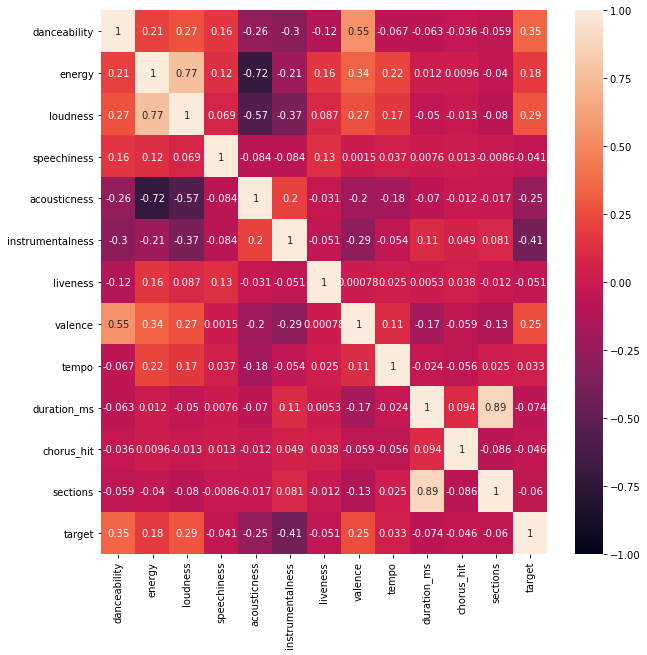

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(df_all[num_preds].corr(), vmin=-1, vmax=1, annot=True)


In [9]:
x = df_all[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'chorus_hit', 'sections']]
y = df_all[response]


scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, 
                                test_size=0.2, random_state=42)

x_train.shape, x_test.shape,y_train.shape, y_test.shape

((32884, 12), (8222, 12), (32884,), (8222,))

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Deep Learning

## Deep Neural Network 

<hr style="height:2pt">

# Tunning Trial 1

In [22]:
def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    
    hp_activation = hp.Choice('activation', values = ['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value = 1, max_value = 1000, step = 100)
    hp_layer_2 = hp.Int('layer_2', min_value = 1, max_value = 1000, step = 100)
    hp_layer_3 = hp.Int('layer_3', min_value = 1, max_value = 1000, step = 100)
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
    
    model.add(tf.keras.layers.Dense(units = hp_layer_1, activation = hp_activation))
    model.add(tf.keras.layers.Dense(units = hp_layer_2, activation = hp_activation))
    model.add(tf.keras.layers.Dense(units = hp_layer_3, activation = hp_activation))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))# output layer

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), 
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])
    return model

import keras_tuner as kt

tuner = kt.Hyperband(model_builder, 
                     objective = 'val_accuracy', 
                     max_epochs = 20, 
                     factor = 3, 
                     directory = 'dir',
                     project_name = 'x2')
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)
tuner.search(x_train, y_train, epochs = 20, validation_data=(x_test, y_test), batch_size=100, callbacks=[stop_early])

In [19]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model  = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20, batch_size=100)

KeyError: '0 does not exist.'

In [ ]:
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))

In [2]:
pip install keras-tuner --upgrade

Requirement already up-to-date: keras-tuner in /Users/alshodiev/opt/anaconda3/lib/python3.8/site-packages (1.1.3)
Note: you may need to restart the kernel to use updated packages.


In [23]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder, 
                     objective = 'val_accuracy', 
                     max_epochs = 20, 
                     factor = 3, 
                     directory = 'dir',
                     project_name = 'x2')

In [24]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

In [25]:
tuner.search(x_train, y_train, epochs = 20, validation_data=(x_test, y_test), batch_size=100, callbacks=[stop_early])

Trial 30 Complete [00h 00m 50s]
val_accuracy: 0.7799805402755737

Best val_accuracy So Far: 0.7876428961753845
Total elapsed time: 00h 15m 14s
INFO:tensorflow:Oracle triggered exit


In [29]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model  = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20, batch_size=100)

Epoch 1/20
329/329 [==============================] - 3s 7ms/step - loss: 0.4964 - accuracy: 0.7555 - val_loss: 0.4743 - val_accuracy: 0.7765
Epoch 2/20
329/329 [==============================] - 2s 6ms/step - loss: 0.4756 - accuracy: 0.7700 - val_loss: 0.4679 - val_accuracy: 0.7791
Epoch 3/20
329/329 [==============================] - 2s 6ms/step - loss: 0.4700 - accuracy: 0.7750 - val_loss: 0.4671 - val_accuracy: 0.7789
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.4645 - accuracy: 0.7778 - val_loss: 0.4620 - val_accuracy: 0.7806
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.4612 - accuracy: 0.7776 - val_loss: 0.4562 - val_accuracy: 0.7811
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.4560 - accuracy: 0.7831 - val_loss: 0.4652 - val_accuracy: 0.7785
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.4526 - accuracy: 0.7830 - val_loss: 0.4541 - val_accuracy: 0.7839
Epoch 

In [30]:
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))

1028/1028 [==============================] - 2s 2ms/step - loss: 0.3261 - accuracy: 0.8534
[0.32608237862586975, 0.8533633351325989]
257/257 [==============================] - 1s 2ms/step - loss: 0.5162 - accuracy: 0.7733
[0.5162435173988342, 0.7732911705970764]


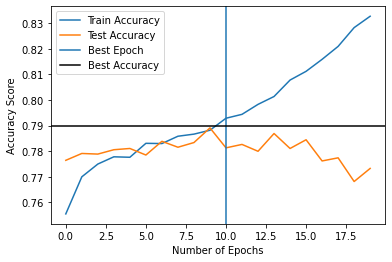

In [41]:
h = history.history
plt.plot(h["accuracy"],label = "Train Accuracy")
plt.plot(h["val_accuracy"],label = "Test Accuracy")
plt.axvline(10,label = 'Best Epoch')
plt.axhline(0.79, c = 'k', label = 'Best Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Score")
plt.legend()


# Tunning Trial 2

In [10]:
def model_builder_1(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    
    hp_activation = hp.Choice('activation', values = ['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value = 1, max_value = 1000, step = 100)
    hp_layer_2 = hp.Int('layer_2', min_value = 1, max_value = 1000, step = 100)
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
    
    model.add(tf.keras.layers.Dense(units = hp_layer_1, activation = hp_activation))
    model.add(tf.keras.layers.Dense(units = hp_layer_2, activation = hp_activation))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))# output layer

    model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate= hp_learning_rate), 
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])
    return model

In [11]:
import keras_tuner as kt

tuner1 = kt.Hyperband(model_builder_1, 
                     objective = 'val_accuracy', 
                     max_epochs = 20, 
                     factor = 3, 
                     directory = 'dir',
                     project_name = 'x')

INFO:tensorflow:Reloading Oracle from existing project dir/x/oracle.json
INFO:tensorflow:Reloading Tuner from dir/x/tuner0.json


In [12]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

In [ ]:
tuner1.search(x_train, y_train, epochs = 20, validation_split = 0.2)


Search: Running Trial #41

Value             |Best Value So Far |Hyperparameter
tanh              |relu              |activation
901               |201               |layer_1
601               |601               |layer_2
0.0001            |0.001             |learning_rate
10                |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/10
823/823 [==============================] - 3s 3ms/step - loss: 0.6603 - accuracy: 0.6124 - val_loss: 0.6198 - val_accuracy: 0.6847
Epoch 2/10
823/823 [==============================] - 2s 3ms/step - loss: 0.5977 - accuracy: 0.6964 - val_loss: 0.5852 - val_accuracy: 0.6990
Epoch 3/10
823/823 [==============================] - 2s 3ms/step - loss: 0.5740 - accuracy: 0.7041 - val_loss: 0.5694 - val_accuracy: 0.7028
Epoch 4/10
823/823 [==============================] - 2s 3ms/step - loss: 0.5620 - accur

In [ ]:
print(model_1.evaluate(x_train, y_train))
print(model_1.evaluate(x_test, y_test))

In [15]:
nn = 210 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

model_a = keras.Sequential([

    keras.layers.Flatten(), #to flaten our data for better results 
    keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer
    keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    ])
model_a.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
#fitting the model 
model_a_fit = model_a.fit(x_train, y_train, epochs=20,
                         validation_data=(x_test, y_test), batch_size=100)


Epoch 1/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5907 - accuracy: 0.6934 - val_loss: 0.5390 - val_accuracy: 0.7248
Epoch 2/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7295 - val_loss: 0.5159 - val_accuracy: 0.7467
Epoch 3/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5148 - accuracy: 0.7421 - val_loss: 0.5048 - val_accuracy: 0.7547
Epoch 4/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.7484 - val_loss: 0.4984 - val_accuracy: 0.7606
Epoch 5/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5011 - accuracy: 0.7518 - val_loss: 0.4939 - val_accuracy: 0.7628
Epoch 6/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4970 - accuracy: 0.7544 - val_loss: 0.4906 - val_accuracy: 0.7668
Epoch 7/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4936 - accuracy: 0.7574 - val_loss: 0.4878 - val_accuracy: 0.7662
Epoch 

In [18]:
print(model_a.evaluate(x_train, y_train))
print(model_a.evaluate(x_test, y_test))

1028/1028 [==============================] - 1s 978us/step - loss: 0.4710 - accuracy: 0.7723
[0.47096386551856995, 0.7722600698471069]
257/257 [==============================] - 0s 932us/step - loss: 0.4708 - accuracy: 0.7734
[0.4708043336868286, 0.773412823677063]


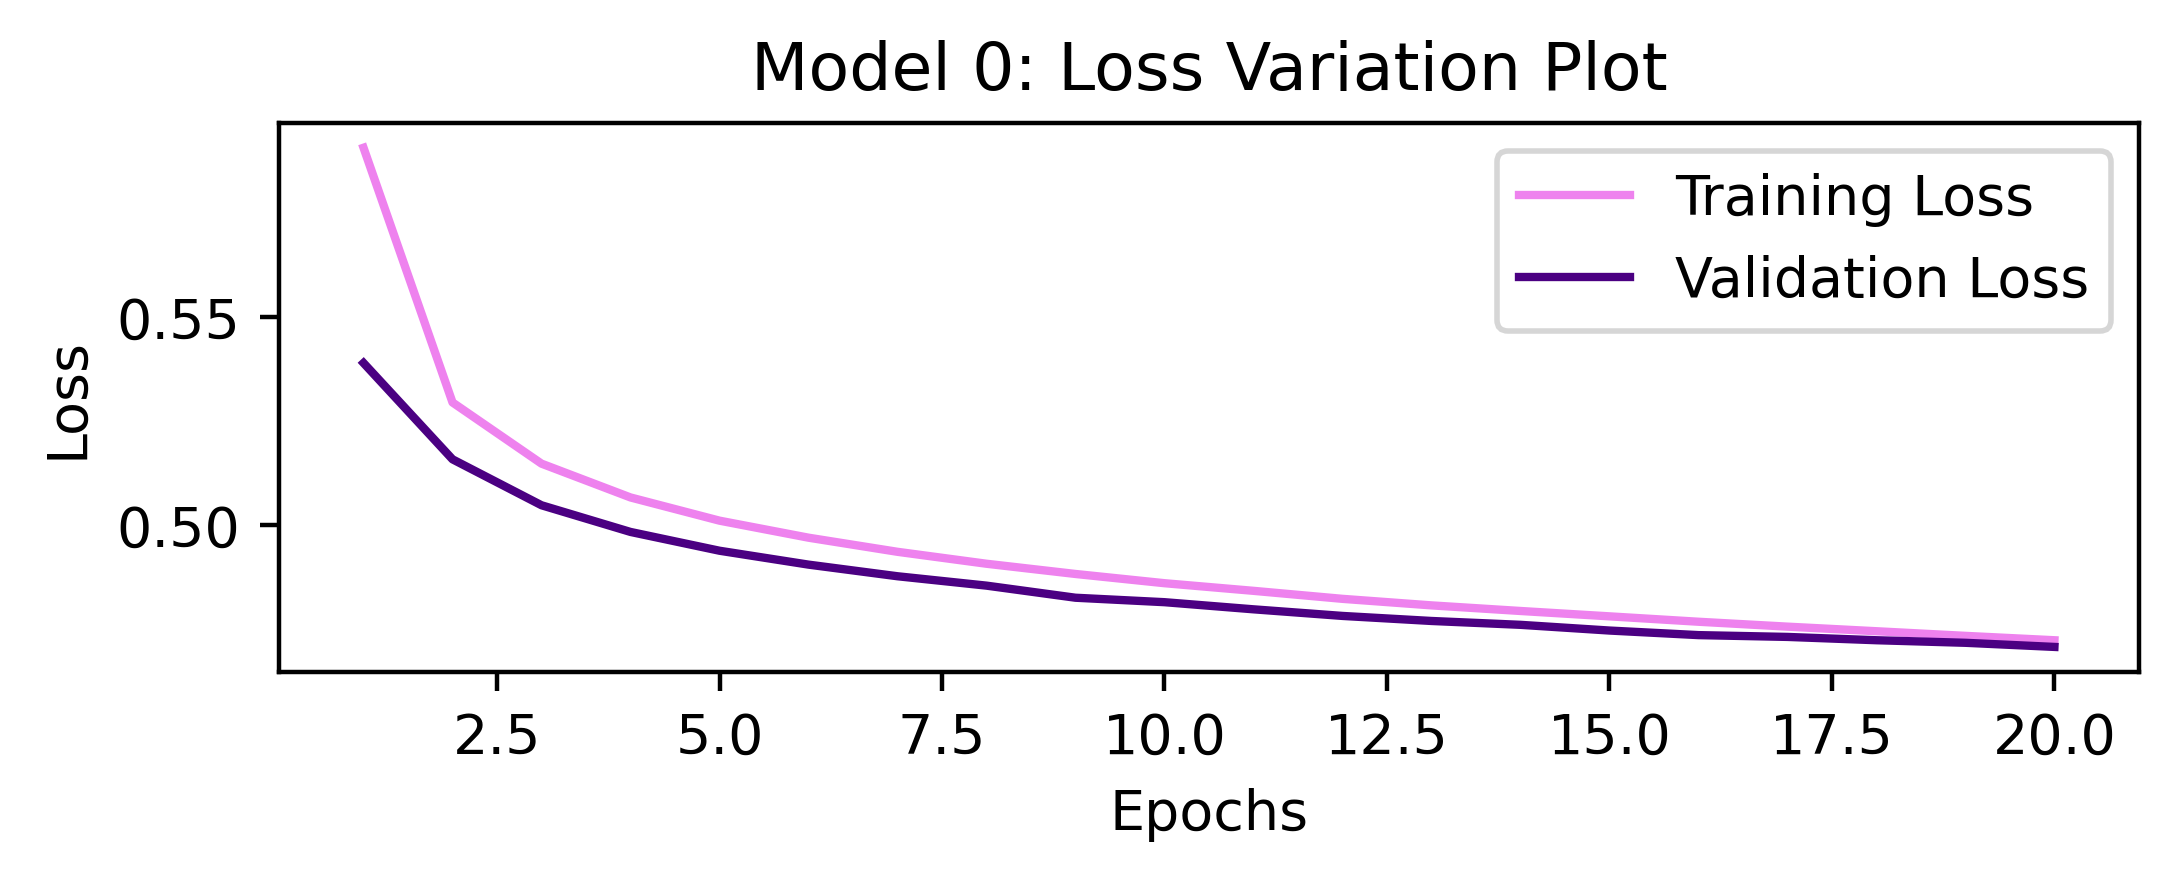

In [16]:
training_loss = model_a_fit.history['loss']
validation_loss = model_a_fit.history['val_loss']
epoch_count_model_a1 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Model 0: Loss Variation Plot')
plt.plot(epoch_count_model_a1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count_model_a1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

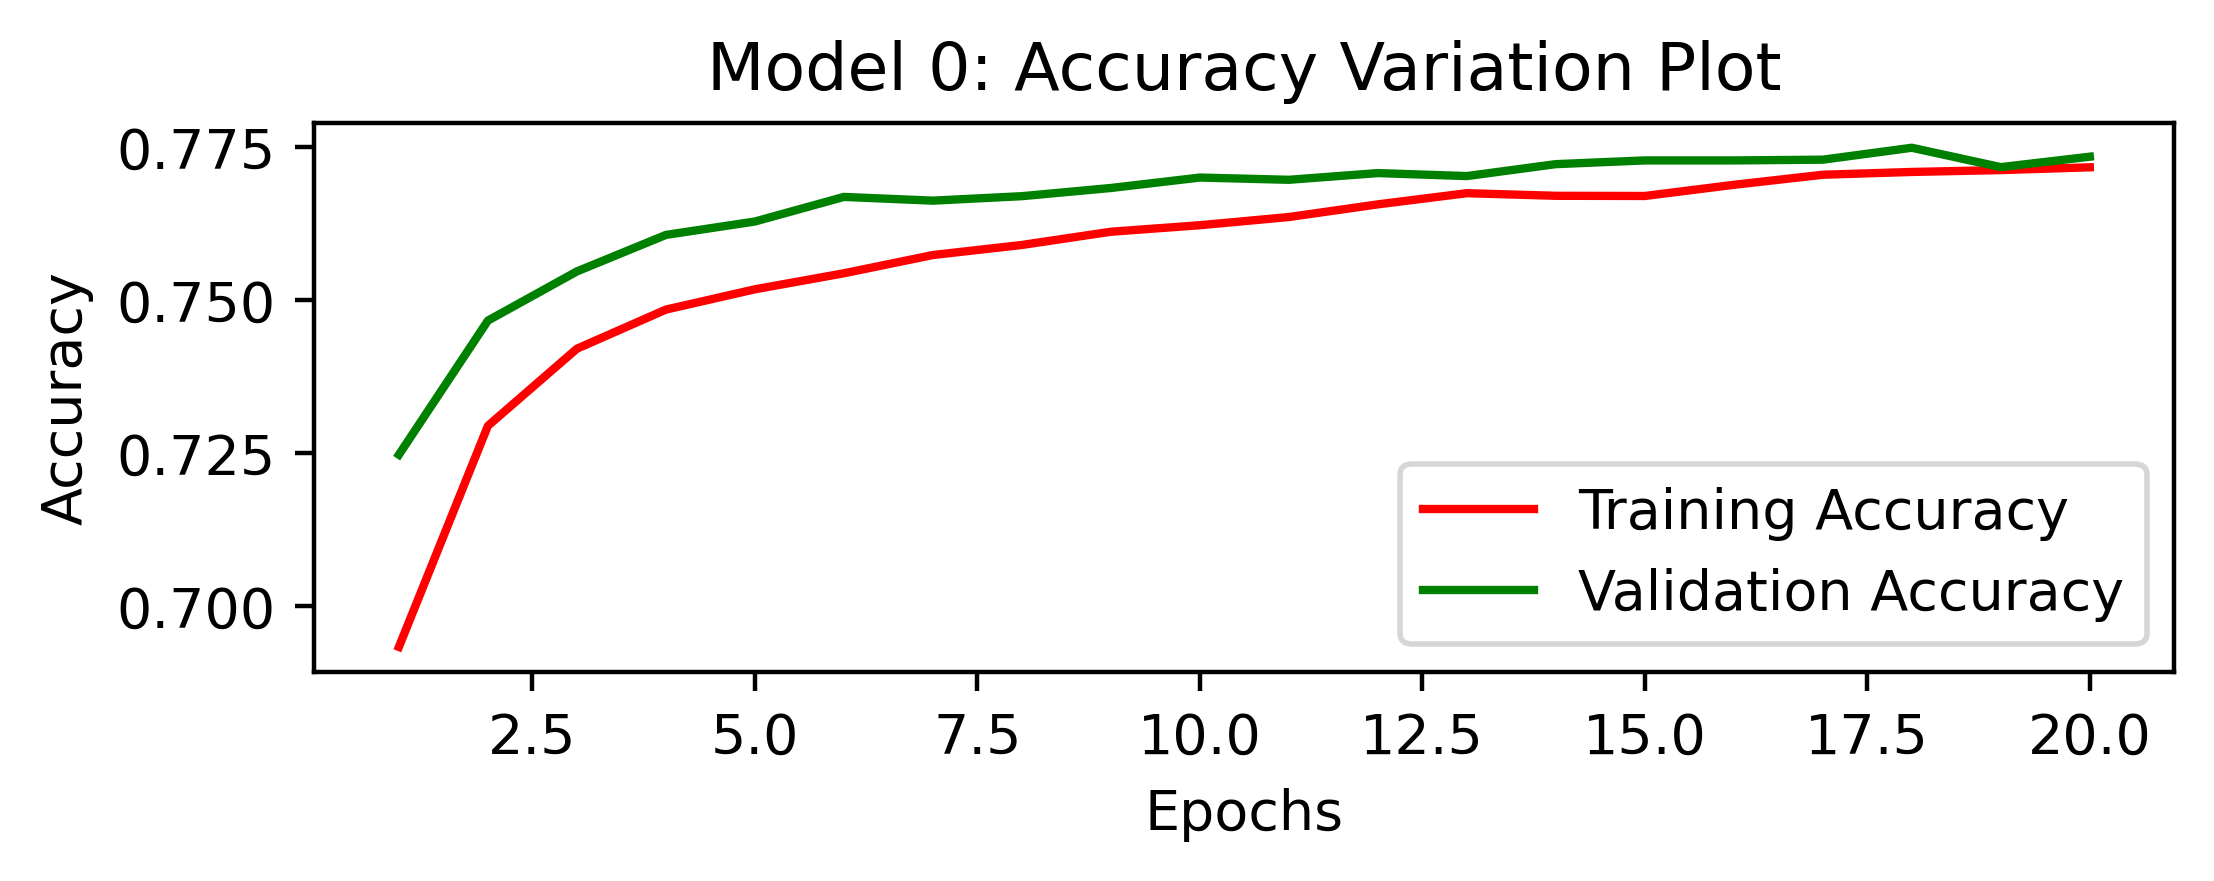

In [17]:
training_acc = model_a_fit.history['accuracy']
validation_acc = model_a_fit.history['val_accuracy']
epoch_count_model_a2 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Model 0: Accuracy Variation Plot')
plt.plot(epoch_count_model_a2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count_model_a2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Neural Network with more layers

In [19]:
nn = 210 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

opt_1 = Adam(learning_rate=0.001)

model_1 = keras.Sequential([

    keras.layers.Flatten(), #to flaten our data for better results 
    keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer
    keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    ])
model_1.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
#fitting the model 
model_1_fit = model_1.fit(x_train, y_train, epochs=20,
                         validation_data=(x_test, y_test), batch_size=100)

Epoch 1/20
329/329 [==============================] - 1s 3ms/step - loss: 0.6092 - accuracy: 0.6650 - val_loss: 0.5465 - val_accuracy: 0.7232
Epoch 2/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.7293 - val_loss: 0.5143 - val_accuracy: 0.7451
Epoch 3/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5103 - accuracy: 0.7447 - val_loss: 0.5011 - val_accuracy: 0.7559
Epoch 4/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5013 - accuracy: 0.7493 - val_loss: 0.4943 - val_accuracy: 0.7608
Epoch 5/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4960 - accuracy: 0.7542 - val_loss: 0.4902 - val_accuracy: 0.7662
Epoch 6/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7575 - val_loss: 0.4869 - val_accuracy: 0.7659
Epoch 7/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4890 - accuracy: 0.7605 - val_loss: 0.4847 - val_accuracy: 0.7650
Epoch 

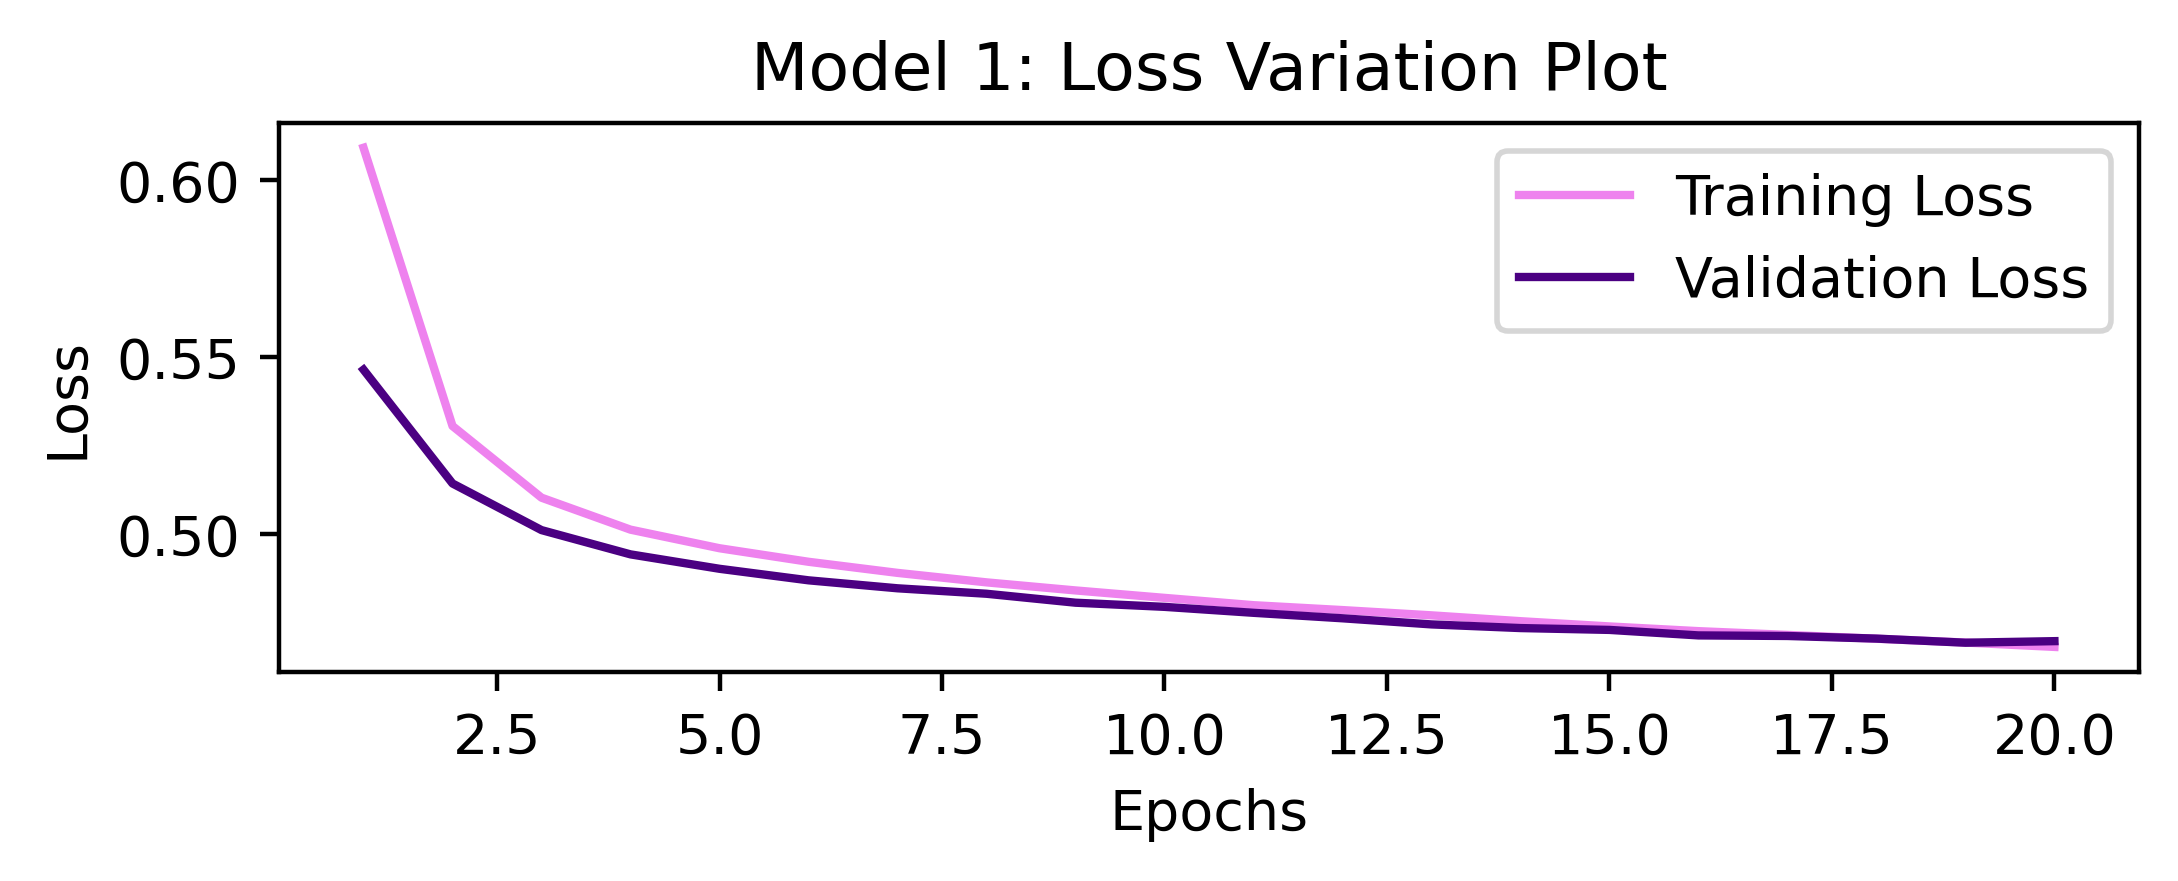

In [20]:
training_loss = model_1_fit.history['loss']
validation_loss = model_1_fit.history['val_loss']
epoch_count_model_11 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Model 1: Loss Variation Plot')
plt.plot(epoch_count_model_11, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count_model_11, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

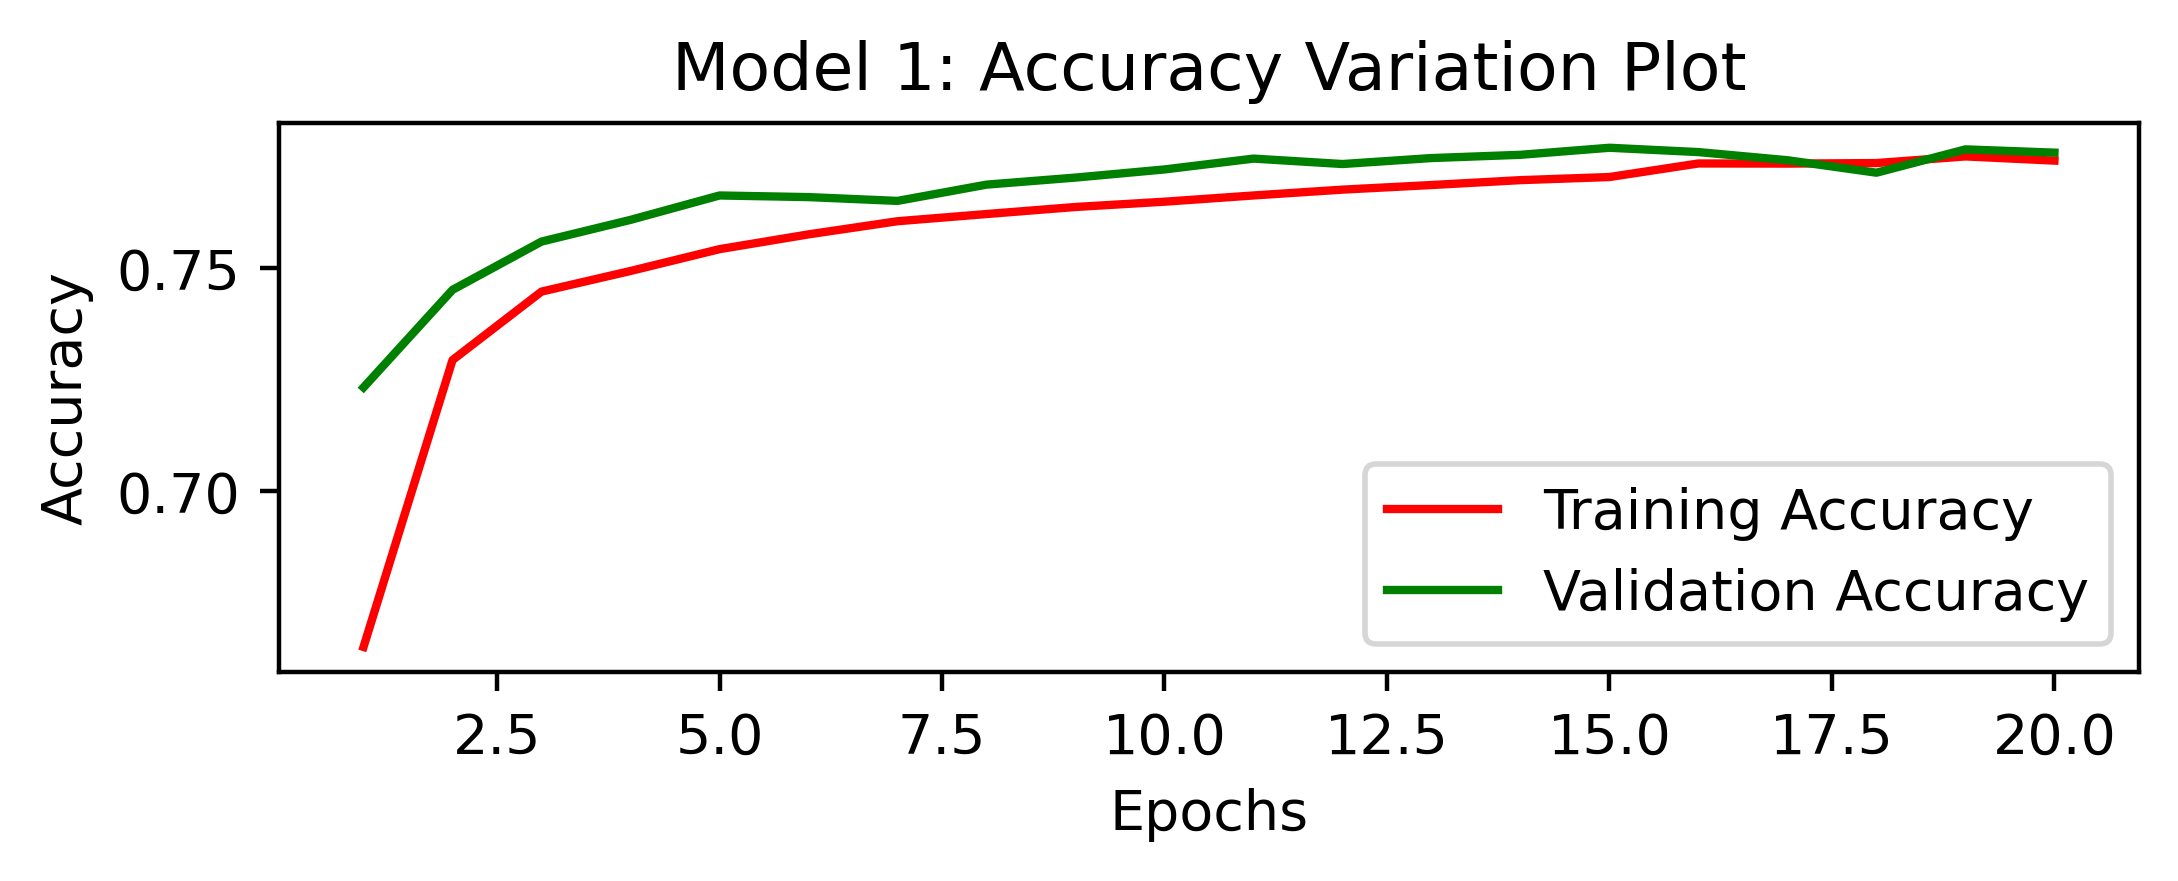

In [21]:
training_acc = model_1_fit.history['accuracy']
validation_acc = model_1_fit.history['val_accuracy']
epoch_count_model_12 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Model 1: Accuracy Variation Plot')
plt.plot(epoch_count_model_12, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count_model_12, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [23]:
print(model_1.evaluate(x_train, y_train))
print(model_1.evaluate(x_test, y_test))

1028/1028 [==============================] - 1s 1ms/step - loss: 0.4667 - accuracy: 0.7758
[0.466655969619751, 0.7757571935653687]
257/257 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7758
[0.469736248254776, 0.7758452892303467]


## Model 2: Increasing the learning rate

In [24]:
nn = 210 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

opt_1 = SGD(learning_rate=0.1)

model_2 = keras.Sequential([

    keras.layers.Flatten(), #to flaten our data for better results 
    keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer
    keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    ])
model_2.compile(optimizer=opt_1, loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

#fitting the model 
model_2_fit = model_2.fit(x_train, y_train, epochs=20,
                         validation_data=(x_test, y_test), batch_size=150)

Epoch 1/20
220/220 [==============================] - 1s 3ms/step - loss: 0.5210 - accuracy: 0.7378 - val_loss: 0.5079 - val_accuracy: 0.7426
Epoch 2/20
220/220 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.7615 - val_loss: 0.4852 - val_accuracy: 0.7588
Epoch 3/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7679 - val_loss: 0.5051 - val_accuracy: 0.7451
Epoch 4/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7706 - val_loss: 0.5422 - val_accuracy: 0.7104
Epoch 5/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7727 - val_loss: 0.4677 - val_accuracy: 0.7730
Epoch 6/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7742 - val_loss: 0.4838 - val_accuracy: 0.7650
Epoch 7/20
220/220 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.7757 - val_loss: 0.4646 - val_accuracy: 0.7745
Epoch 

In [25]:
print(model_2.evaluate(x_train, y_train))
print(model_2.evaluate(x_test, y_test))

1028/1028 [==============================] - 1s 1ms/step - loss: 0.4597 - accuracy: 0.7773
[0.45972490310668945, 0.7773385047912598]
257/257 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7633
[0.4835423529148102, 0.7633179426193237]


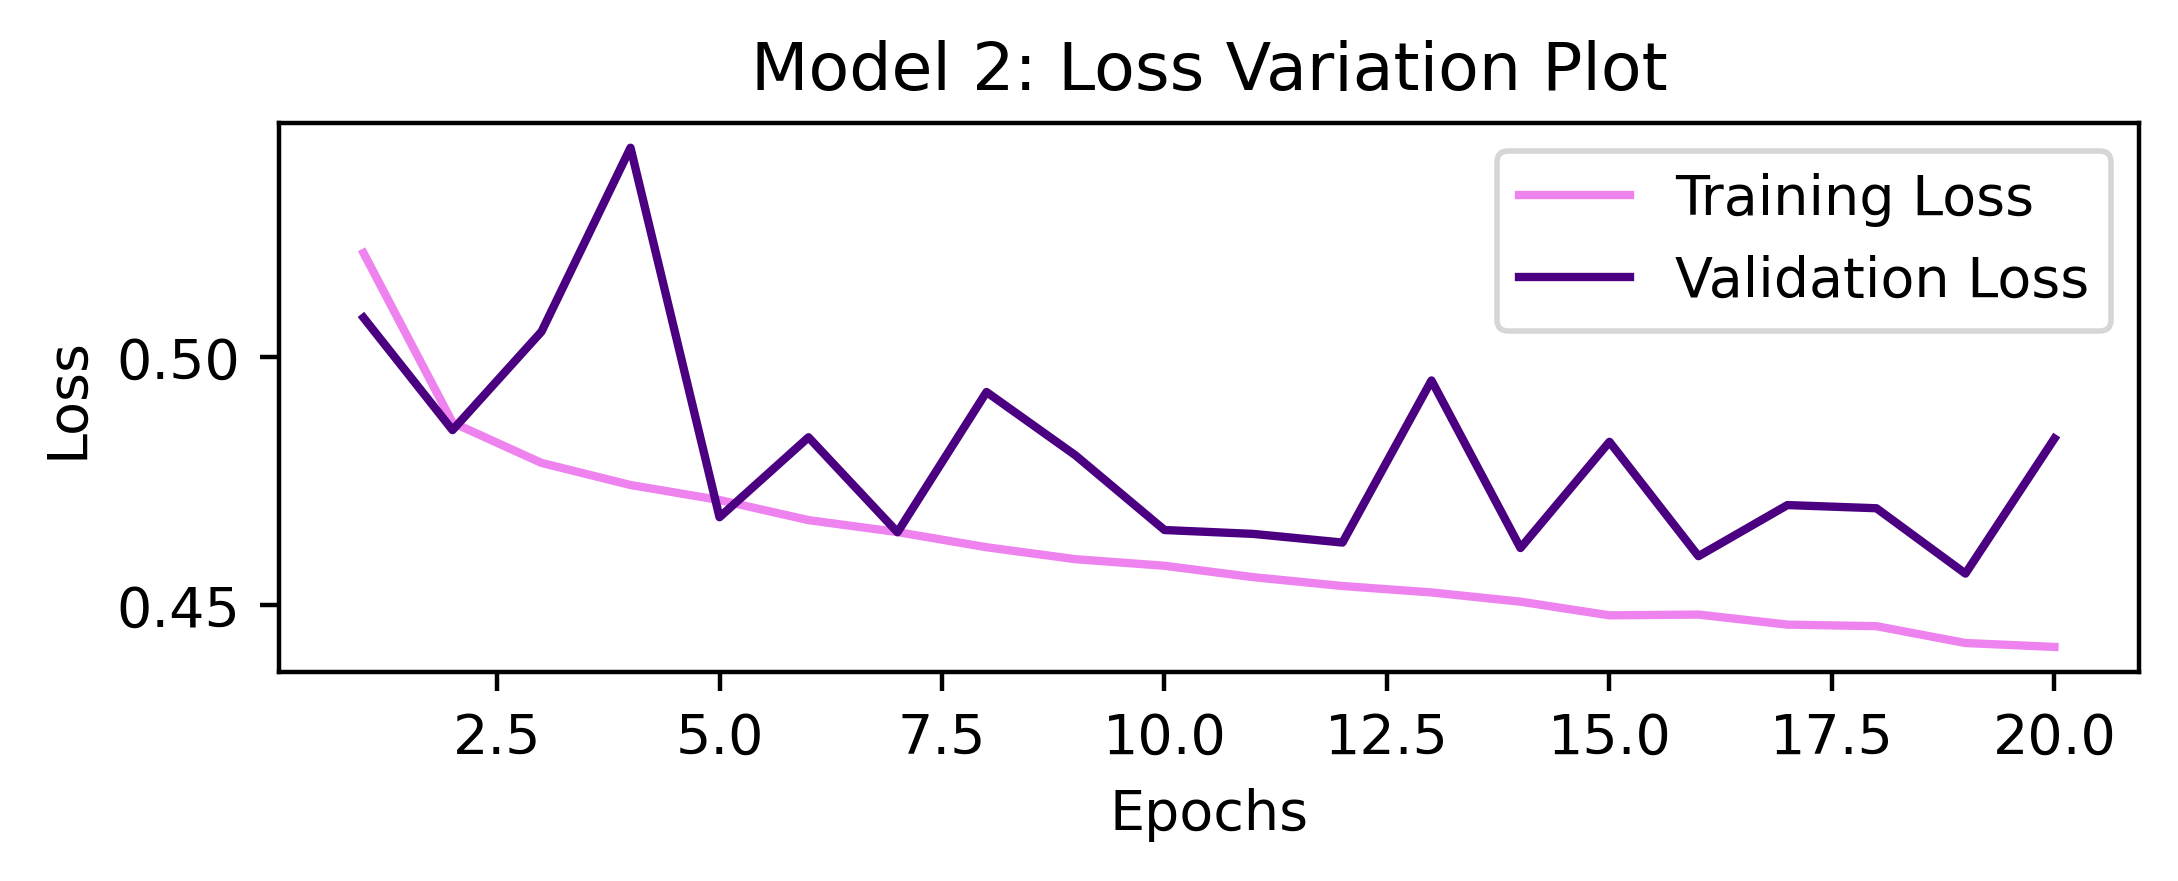

In [26]:
training_loss = model_2_fit.history['loss']
validation_loss = model_2_fit.history['val_loss']
epoch_count_model_21 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Model 2: Loss Variation Plot')
plt.plot(epoch_count_model_21, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count_model_21, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


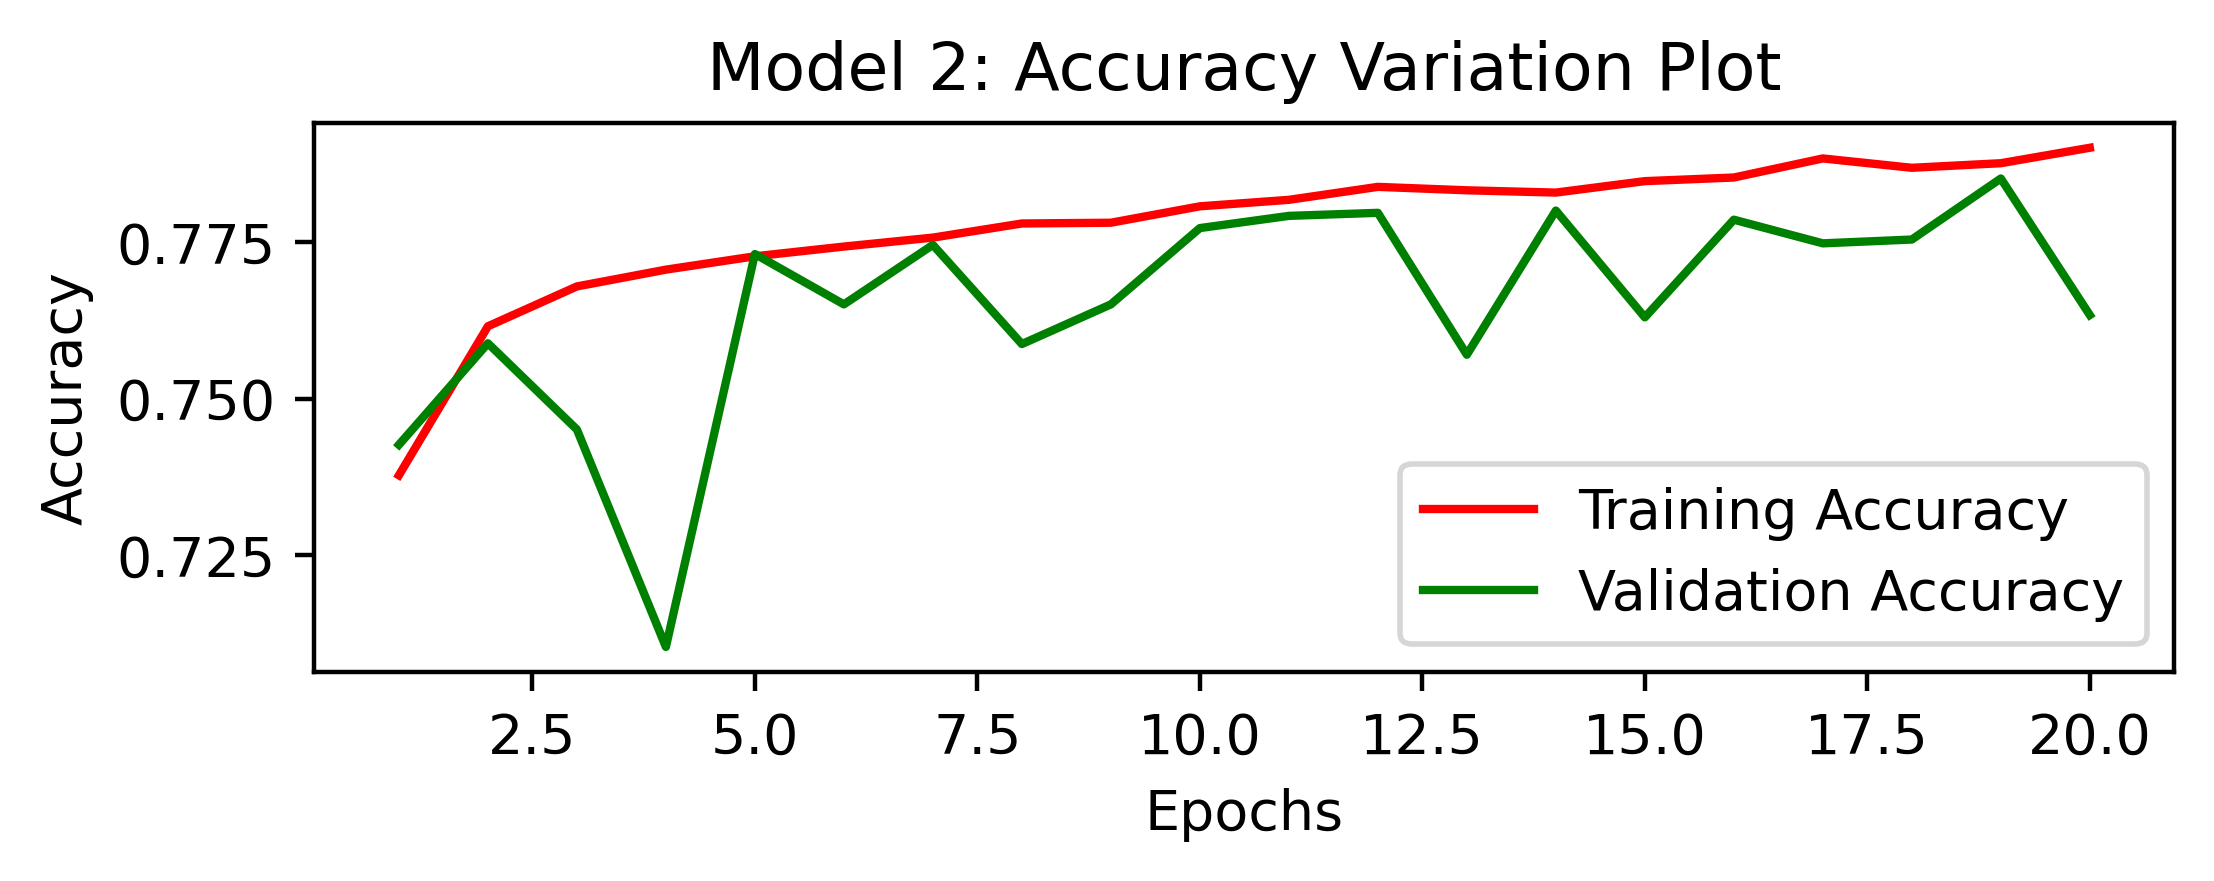

In [27]:
training_acc = model_2_fit.history['accuracy']
validation_acc = model_2_fit.history['val_accuracy']
epoch_count_model_22 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Model 2: Accuracy Variation Plot')
plt.plot(epoch_count_model_22, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count_model_22, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


## Model 3: Changing an Optimizer

In [28]:
nn = 210 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

opt_1 = Adam(learning_rate=0.001)

model_3 = keras.Sequential([

    keras.layers.Flatten(), #to flaten our data for better results 
    keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer
    keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    ])
model_3.compile(optimizer=opt_1, loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
#fitting the model 
model_3_fit = model_3.fit(x_train, y_train, epochs=20,
                         validation_data=(x_test, y_test), batch_size=100)

Epoch 1/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4988 - accuracy: 0.7513 - val_loss: 0.4753 - val_accuracy: 0.7713
Epoch 2/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4758 - accuracy: 0.7685 - val_loss: 0.4658 - val_accuracy: 0.7756
Epoch 3/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.7732 - val_loss: 0.4606 - val_accuracy: 0.7817
Epoch 4/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.7759 - val_loss: 0.4608 - val_accuracy: 0.7795
Epoch 5/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.7801 - val_loss: 0.4634 - val_accuracy: 0.7808
Epoch 6/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4540 - accuracy: 0.7827 - val_loss: 0.4561 - val_accuracy: 0.7848
Epoch 7/20
329/329 [==============================] - 1s 2ms/step - loss: 0.4495 - accuracy: 0.7860 - val_loss: 0.4671 - val_accuracy: 0.7780
Epoch 

In [29]:
print(model_3.evaluate(x_train, y_train))
print(model_3.evaluate(x_test, y_test))

1028/1028 [==============================] - 1s 962us/step - loss: 0.3344 - accuracy: 0.8525
[0.3344329297542572, 0.8525118827819824]
257/257 [==============================] - 0s 979us/step - loss: 0.5609 - accuracy: 0.7660
[0.5609429478645325, 0.7659936547279358]


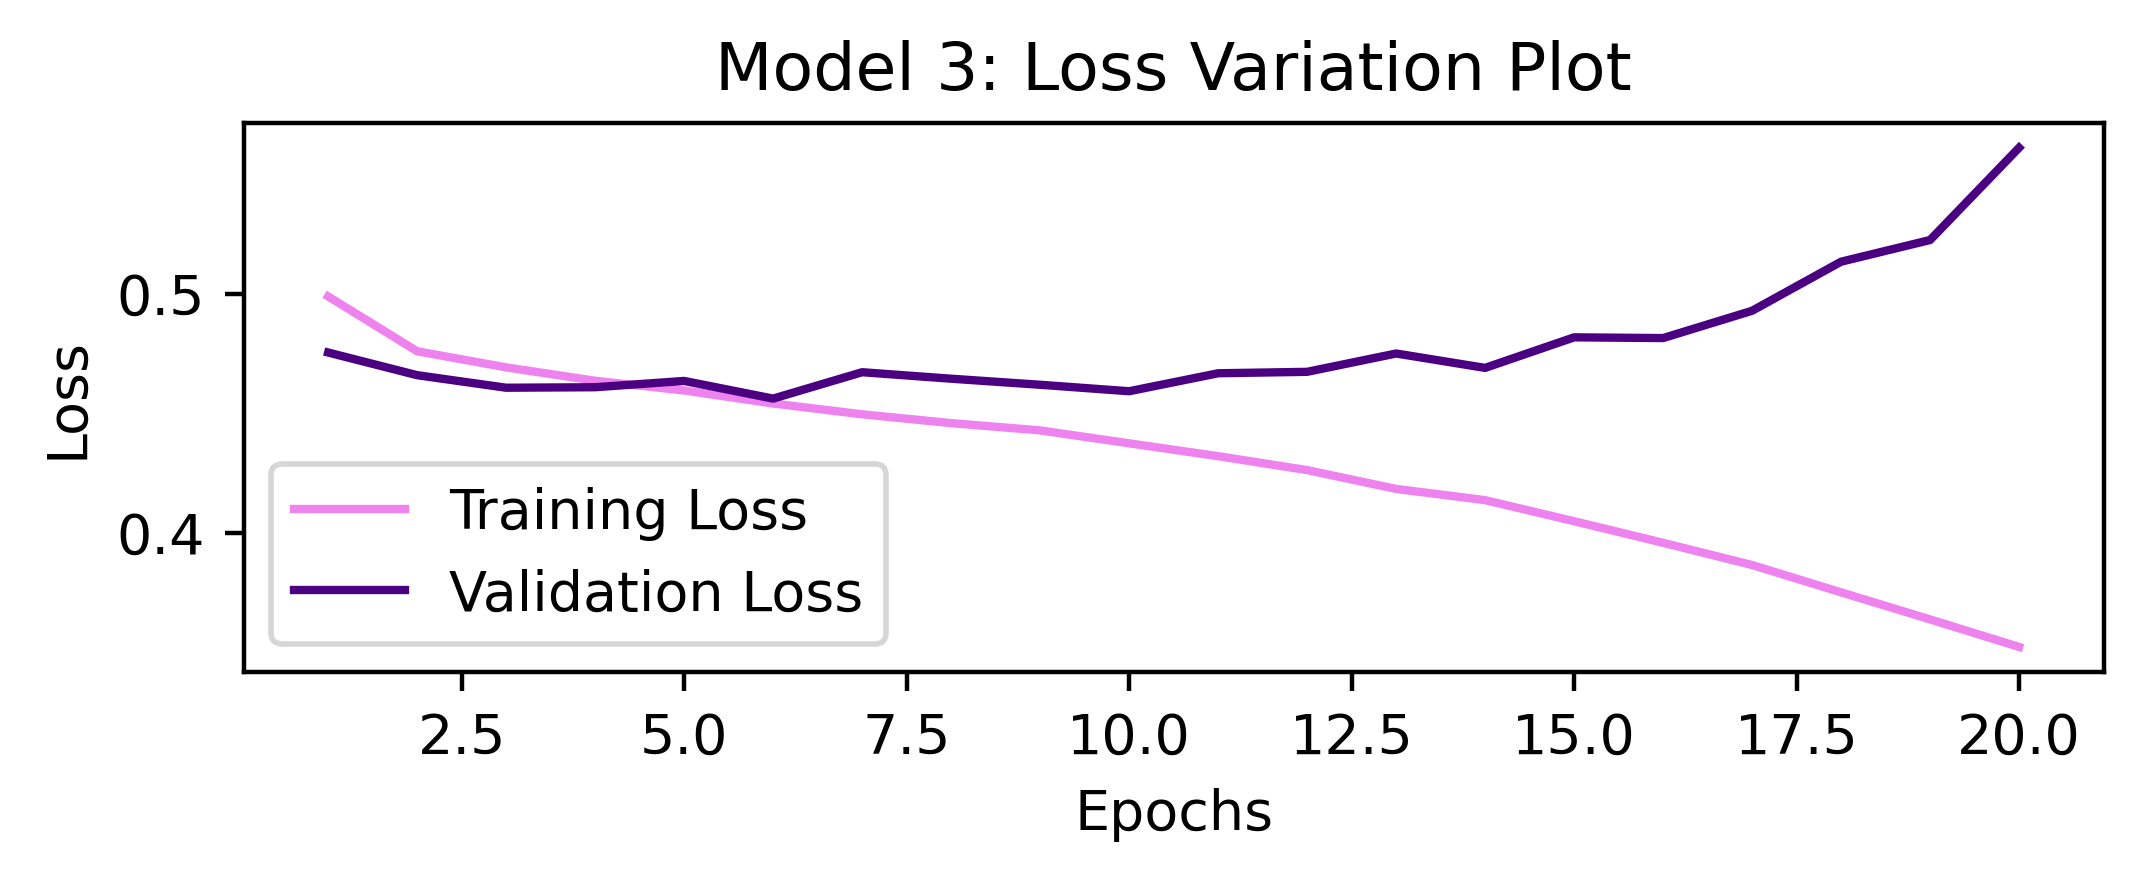

In [30]:
training_loss = model_3_fit.history['loss']
validation_loss = model_3_fit.history['val_loss']
epoch_count_model_31 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Model 3: Loss Variation Plot')
plt.plot(epoch_count_model_31, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count_model_31, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

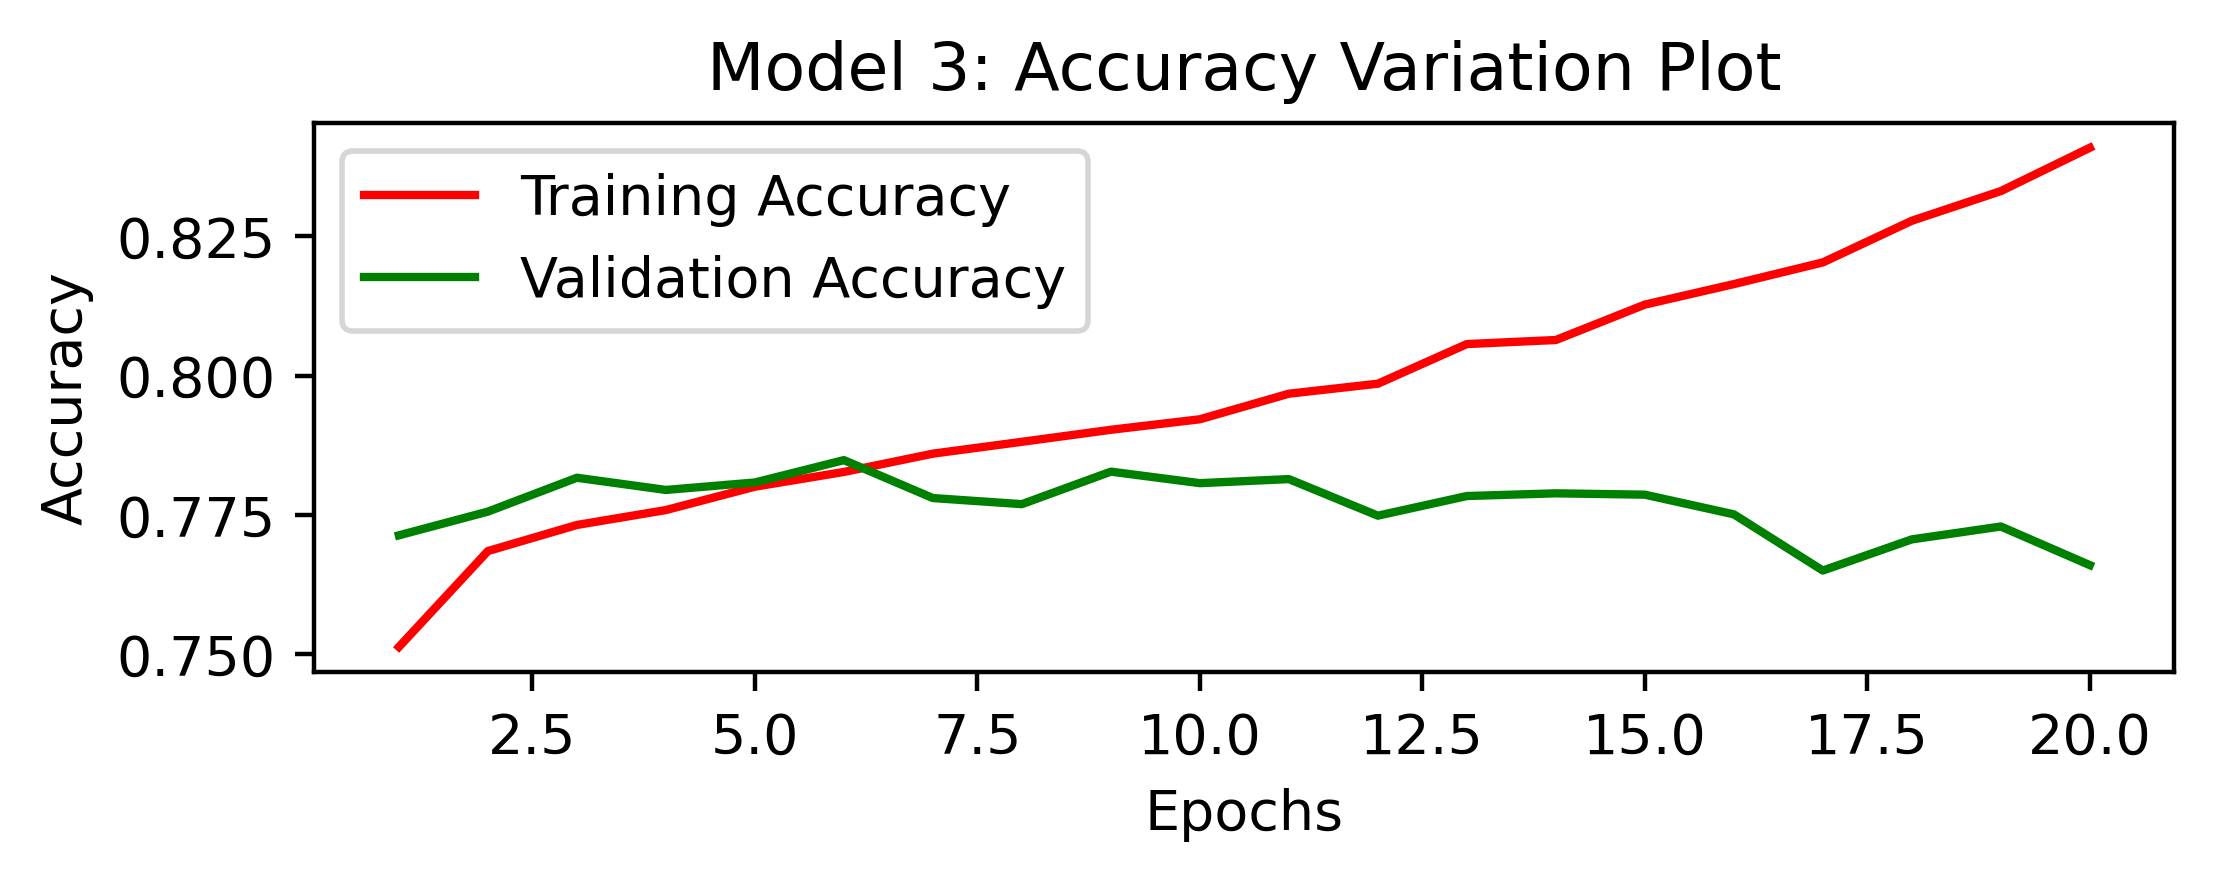

In [31]:
training_acc = model_3_fit.history['accuracy']
validation_acc = model_3_fit.history['val_accuracy']
epoch_count_model_32 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Model 3: Accuracy Variation Plot')
plt.plot(epoch_count_model_32, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count_model_32, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


## Model 4: Increasing number of layers

In [32]:
nn = 210 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

model_4 = keras.Sequential([

    keras.layers.Flatten(), #to flaten our data for better results 
    keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# fourth hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# fourth hidden layer
    keras.layers.Dense(nn, activation=tf.nn.relu),# fifth hidden layer
    keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    ])
model_4.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
#fitting the model 
model_4_fit = model_4.fit(x_train, y_train, epochs=20,
                         validation_data=(x_test, y_test), batch_size=100)

Epoch 1/20
329/329 [==============================] - 1s 3ms/step - loss: 0.6337 - accuracy: 0.6571 - val_loss: 0.5583 - val_accuracy: 0.7256
Epoch 2/20
329/329 [==============================] - 1s 3ms/step - loss: 0.5293 - accuracy: 0.7330 - val_loss: 0.5083 - val_accuracy: 0.7526
Epoch 3/20
329/329 [==============================] - 1s 2ms/step - loss: 0.5058 - accuracy: 0.7488 - val_loss: 0.4981 - val_accuracy: 0.7581
Epoch 4/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4977 - accuracy: 0.7542 - val_loss: 0.4909 - val_accuracy: 0.7623
Epoch 5/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4915 - accuracy: 0.7585 - val_loss: 0.4866 - val_accuracy: 0.7666
Epoch 6/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.7620 - val_loss: 0.4841 - val_accuracy: 0.7690
Epoch 7/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4834 - accuracy: 0.7650 - val_loss: 0.4809 - val_accuracy: 0.7687
Epoch 

In [33]:
print(model_4.evaluate(x_train, y_train))
print(model_4.evaluate(x_test, y_test))

1028/1028 [==============================] - 1s 1ms/step - loss: 0.4564 - accuracy: 0.7834
[0.45641598105430603, 0.7834205031394958]
257/257 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7746
[0.4669116735458374, 0.7746290564537048]


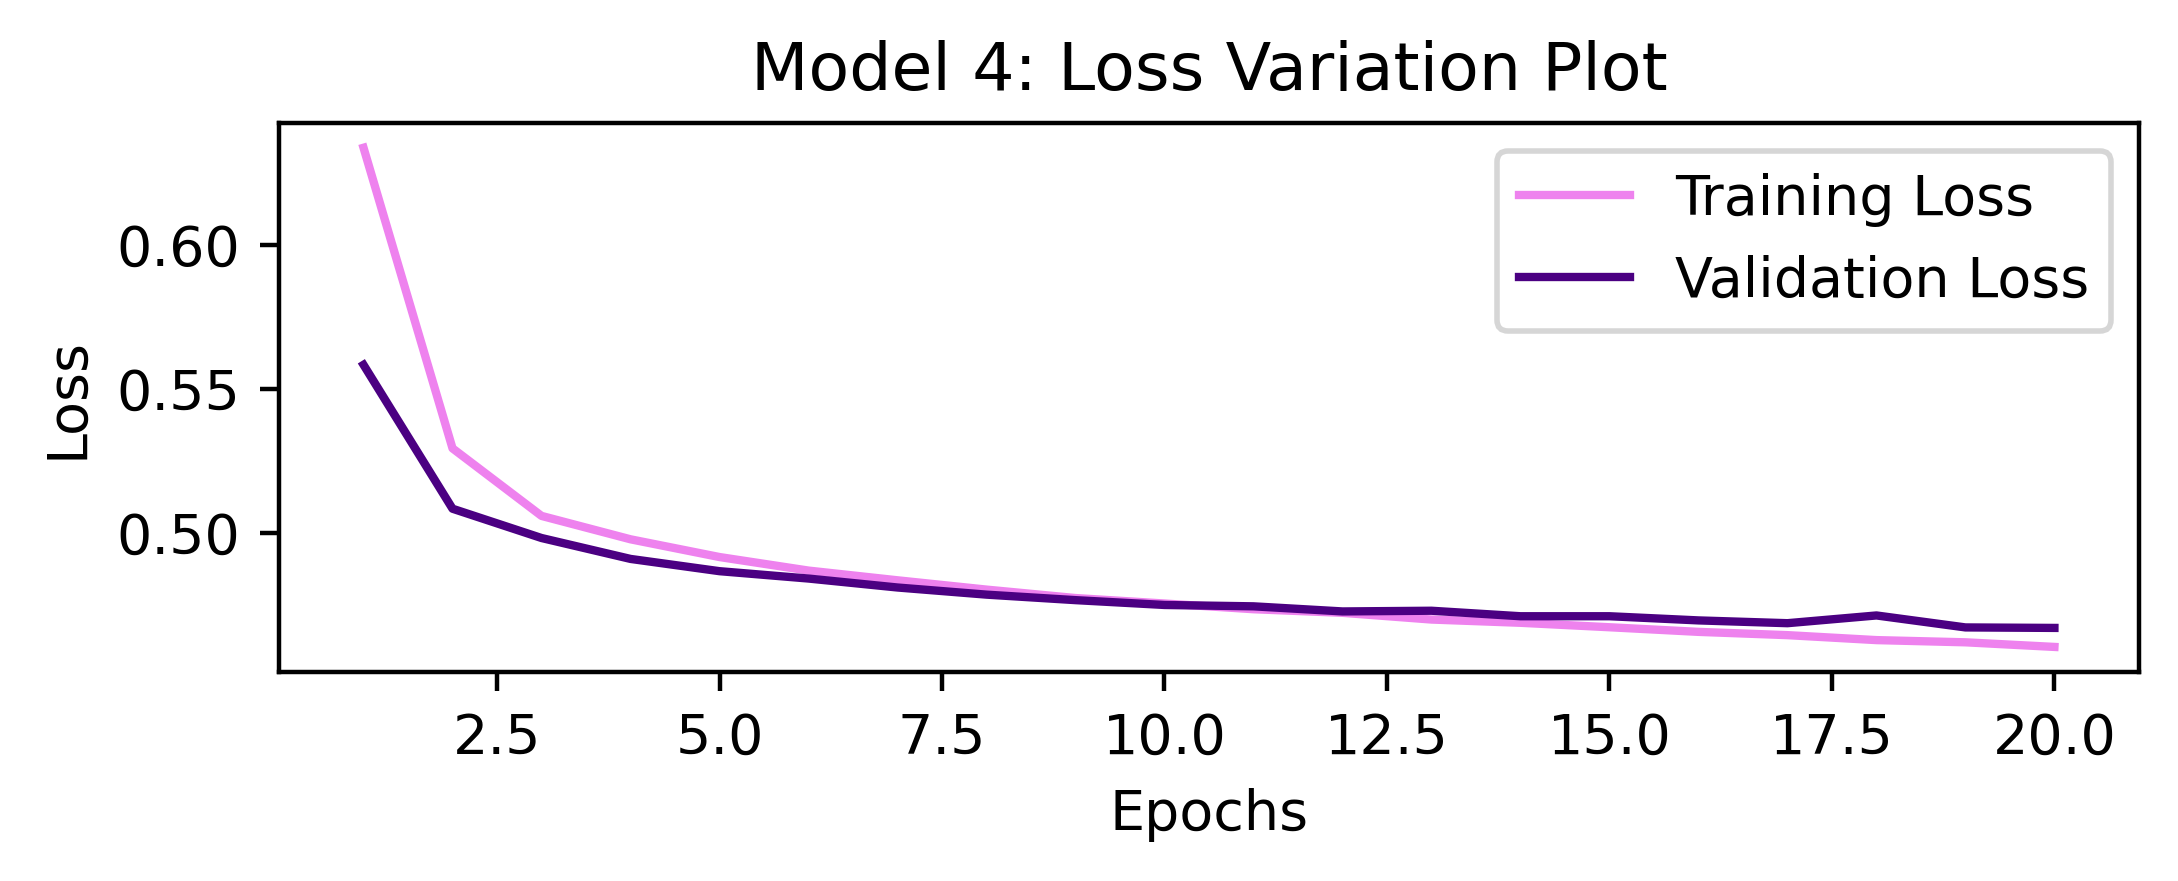

In [34]:
training_loss = model_4_fit.history['loss']
validation_loss = model_4_fit.history['val_loss']
epoch_count_model_41 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Model 4: Loss Variation Plot')
plt.plot(epoch_count_model_41, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count_model_41, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

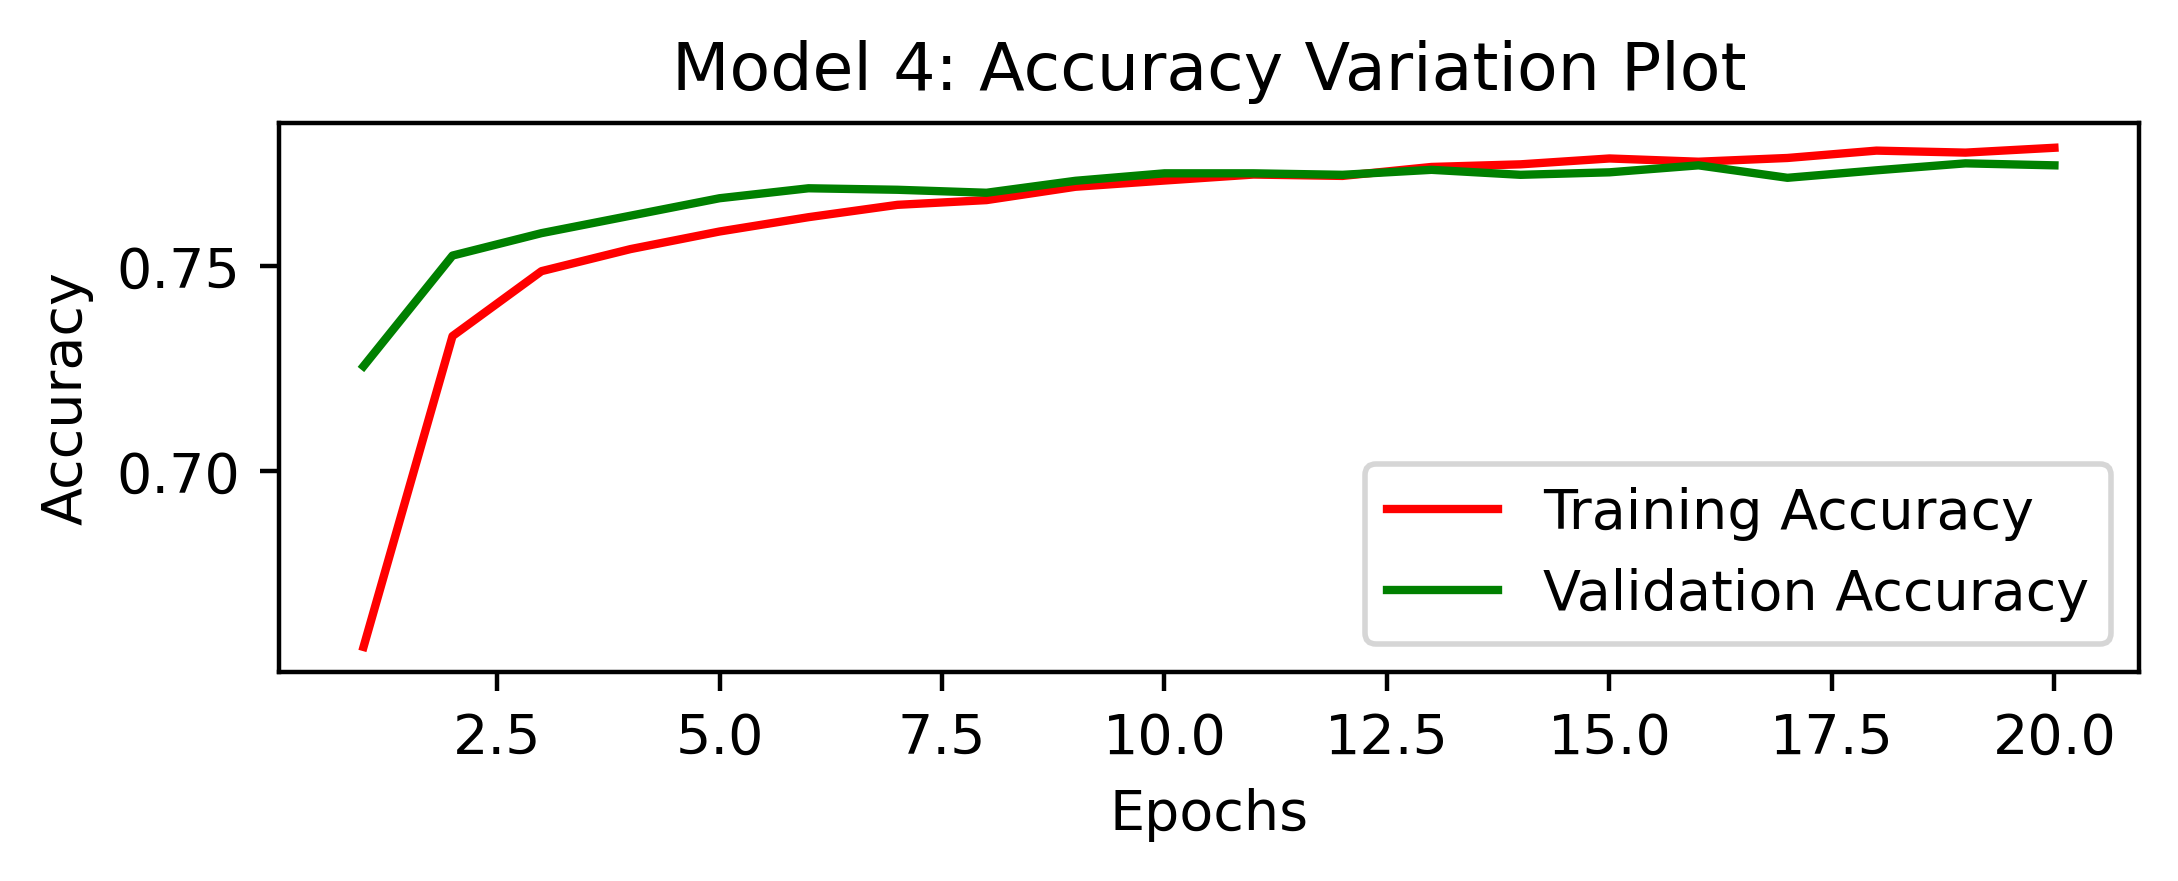

In [35]:
training_acc = model_4_fit.history['accuracy']
validation_acc = model_4_fit.history['val_accuracy']
epoch_count_model_42 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Model 4: Accuracy Variation Plot')
plt.plot(epoch_count_model_42, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count_model_42, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Model 5: Dropout/ Adding Regularization

In [36]:
from tensorflow.keras.regularizers import L2

In [37]:
nn = 210 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

model_5 = keras.Sequential([

    keras.layers.Flatten(), #to flaten our data for better results 
    keras.layers.Dense(nn, activation=tf.nn.relu, kernel_regularizer = L2(0.001)),# first hidden  layer
    keras.layers.Dropout(0.05),
    keras.layers.Dense(nn, activation=tf.nn.relu, kernel_regularizer = L2(0.001)),# second hidden layer
    keras.layers.Dropout(0.05),
    keras.layers.Dense(nn, activation=tf.nn.relu, kernel_regularizer = L2(0.001)),# second hidden layer
    keras.layers.Dropout(0.05),
    keras.layers.Dense(nn, activation=tf.nn.relu, kernel_regularizer = L2(0.001)),# third hidden layer
    keras.layers.Dropout(0.05),
    keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    ])
model_5.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
#fitting the model 
model_5_fit = model_5.fit(x_train, y_train, epochs=20,
                         validation_data=(x_test, y_test), batch_size=100)

Epoch 1/20
329/329 [==============================] - 2s 3ms/step - loss: 1.2574 - accuracy: 0.6766 - val_loss: 1.1924 - val_accuracy: 0.7214
Epoch 2/20
329/329 [==============================] - 1s 3ms/step - loss: 1.1766 - accuracy: 0.7252 - val_loss: 1.1534 - val_accuracy: 0.7420
Epoch 3/20
329/329 [==============================] - 1s 3ms/step - loss: 1.1521 - accuracy: 0.7389 - val_loss: 1.1346 - val_accuracy: 0.7513
Epoch 4/20
329/329 [==============================] - 1s 3ms/step - loss: 1.1360 - accuracy: 0.7459 - val_loss: 1.1208 - val_accuracy: 0.7569
Epoch 5/20
329/329 [==============================] - 1s 3ms/step - loss: 1.1236 - accuracy: 0.7488 - val_loss: 1.1091 - val_accuracy: 0.7591
Epoch 6/20
329/329 [==============================] - 1s 3ms/step - loss: 1.1120 - accuracy: 0.7495 - val_loss: 1.0982 - val_accuracy: 0.7608
Epoch 7/20
329/329 [==============================] - 1s 3ms/step - loss: 1.1018 - accuracy: 0.7531 - val_loss: 1.0880 - val_accuracy: 0.7622
Epoch 

In [38]:
print(model_5.evaluate(x_train, y_train))
print(model_5.evaluate(x_test, y_test))

1028/1028 [==============================] - 2s 2ms/step - loss: 0.9805 - accuracy: 0.7739
[0.9804869294166565, 0.773902177810669]
257/257 [==============================] - 1s 2ms/step - loss: 0.9800 - accuracy: 0.7757
[0.9800076484680176, 0.7757236957550049]


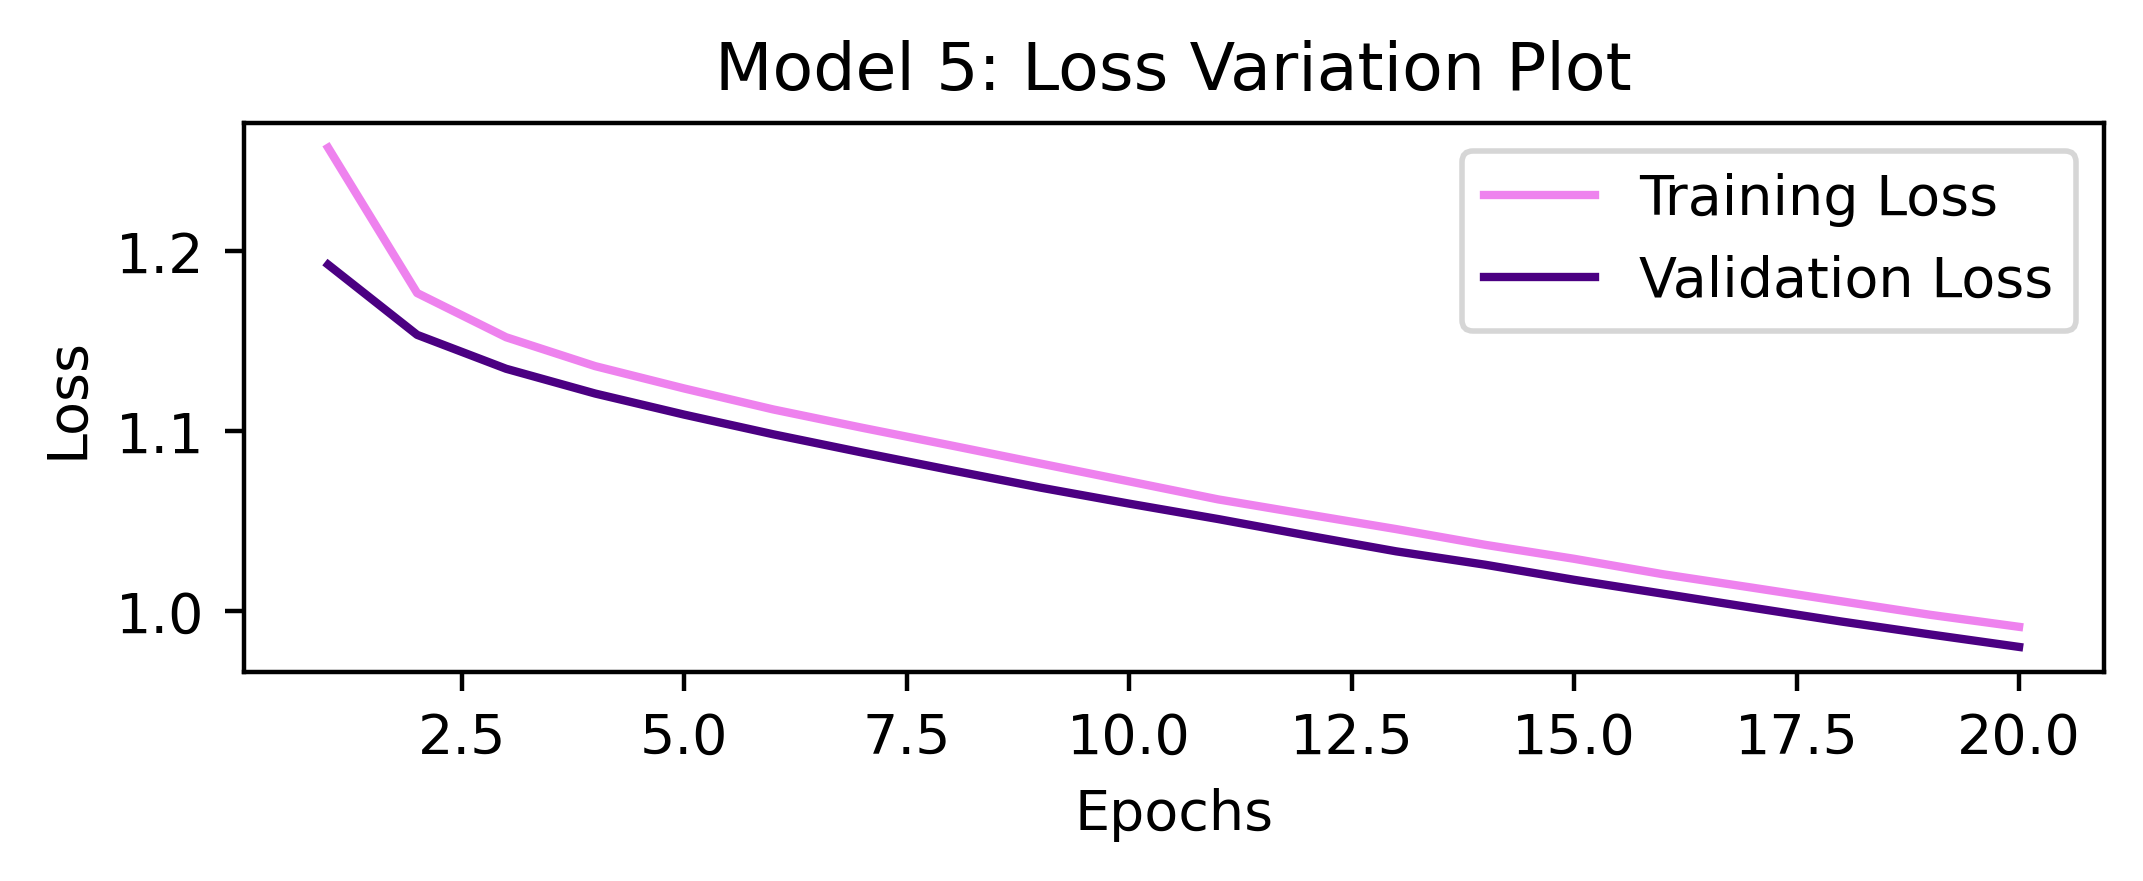

In [39]:
training_loss = model_5_fit.history['loss']
validation_loss = model_5_fit.history['val_loss']
epoch_count_model_51 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Model 5: Loss Variation Plot')
plt.plot(epoch_count_model_51, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count_model_51, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

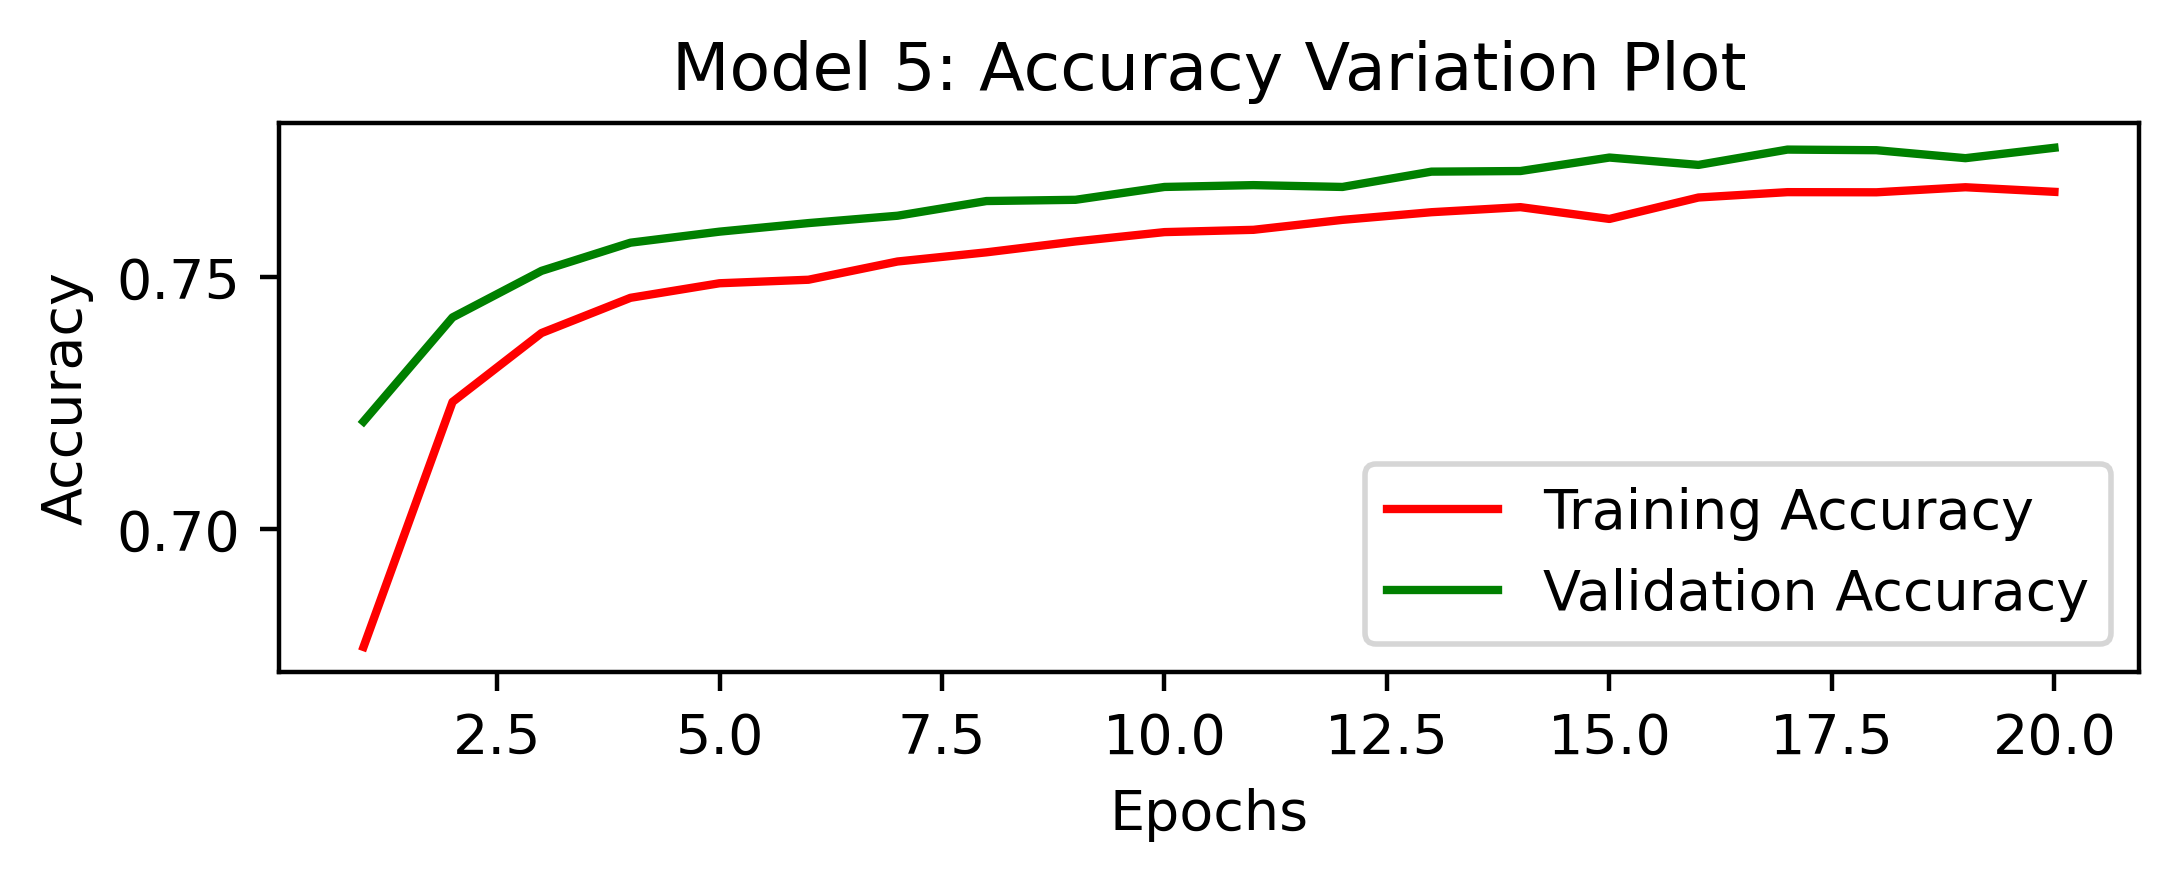

In [40]:
training_acc = model_5_fit.history['accuracy']
validation_acc = model_5_fit.history['val_accuracy']
epoch_count_model_52 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Model 5: Accuracy Variation Plot')
plt.plot(epoch_count_model_52, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count_model_52, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


## Model 6: Best Model + Regularization

In [41]:
nn = 210 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

opt_1 = Adam(learning_rate=0.001)

model_6 = keras.Sequential([

    keras.layers.Flatten(), #to flaten our data for better results 
    keras.layers.Dense(nn, activation=tf.nn.relu, kernel_regularizer = L2(0.001)),# first hidden  layer
    keras.layers.Dropout(0.05),
    keras.layers.Dense(nn, activation=tf.nn.relu, kernel_regularizer = L2(0.001)),# second hidden layer
    keras.layers.Dropout(0.05),
    keras.layers.Dense(nn, activation=tf.nn.relu, kernel_regularizer = L2(0.001)),# second hidden layer
    keras.layers.Dropout(0.05),
    keras.layers.Dense(nn, activation=tf.nn.relu, kernel_regularizer = L2(0.001)),# third hidden layer
    keras.layers.Dropout(0.05),
    keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    ])
model_6.compile(optimizer=opt_1, loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
#fitting the model 
model_6_fit = model_6.fit(x_train, y_train, epochs=20,
                         validation_data=(x_test, y_test), batch_size=100)

Epoch 1/20
329/329 [==============================] - 2s 3ms/step - loss: 0.7464 - accuracy: 0.7470 - val_loss: 0.5743 - val_accuracy: 0.7662
Epoch 2/20
329/329 [==============================] - 1s 3ms/step - loss: 0.5489 - accuracy: 0.7641 - val_loss: 0.5204 - val_accuracy: 0.7729
Epoch 3/20
329/329 [==============================] - 1s 3ms/step - loss: 0.5159 - accuracy: 0.7670 - val_loss: 0.4999 - val_accuracy: 0.7765
Epoch 4/20
329/329 [==============================] - 1s 3ms/step - loss: 0.5054 - accuracy: 0.7696 - val_loss: 0.4945 - val_accuracy: 0.7748
Epoch 5/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4977 - accuracy: 0.7723 - val_loss: 0.4912 - val_accuracy: 0.7771
Epoch 6/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4944 - accuracy: 0.7724 - val_loss: 0.4957 - val_accuracy: 0.7743
Epoch 7/20
329/329 [==============================] - 1s 3ms/step - loss: 0.4921 - accuracy: 0.7733 - val_loss: 0.4851 - val_accuracy: 0.7785
Epoch 

In [42]:
print(model_6.evaluate(x_train, y_train))
print(model_6.evaluate(x_test, y_test))

1028/1028 [==============================] - 1s 977us/step - loss: 0.4723 - accuracy: 0.7817
[0.4723052978515625, 0.7816567420959473]
257/257 [==============================] - 0s 961us/step - loss: 0.4745 - accuracy: 0.7814
[0.4745403528213501, 0.781440019607544]


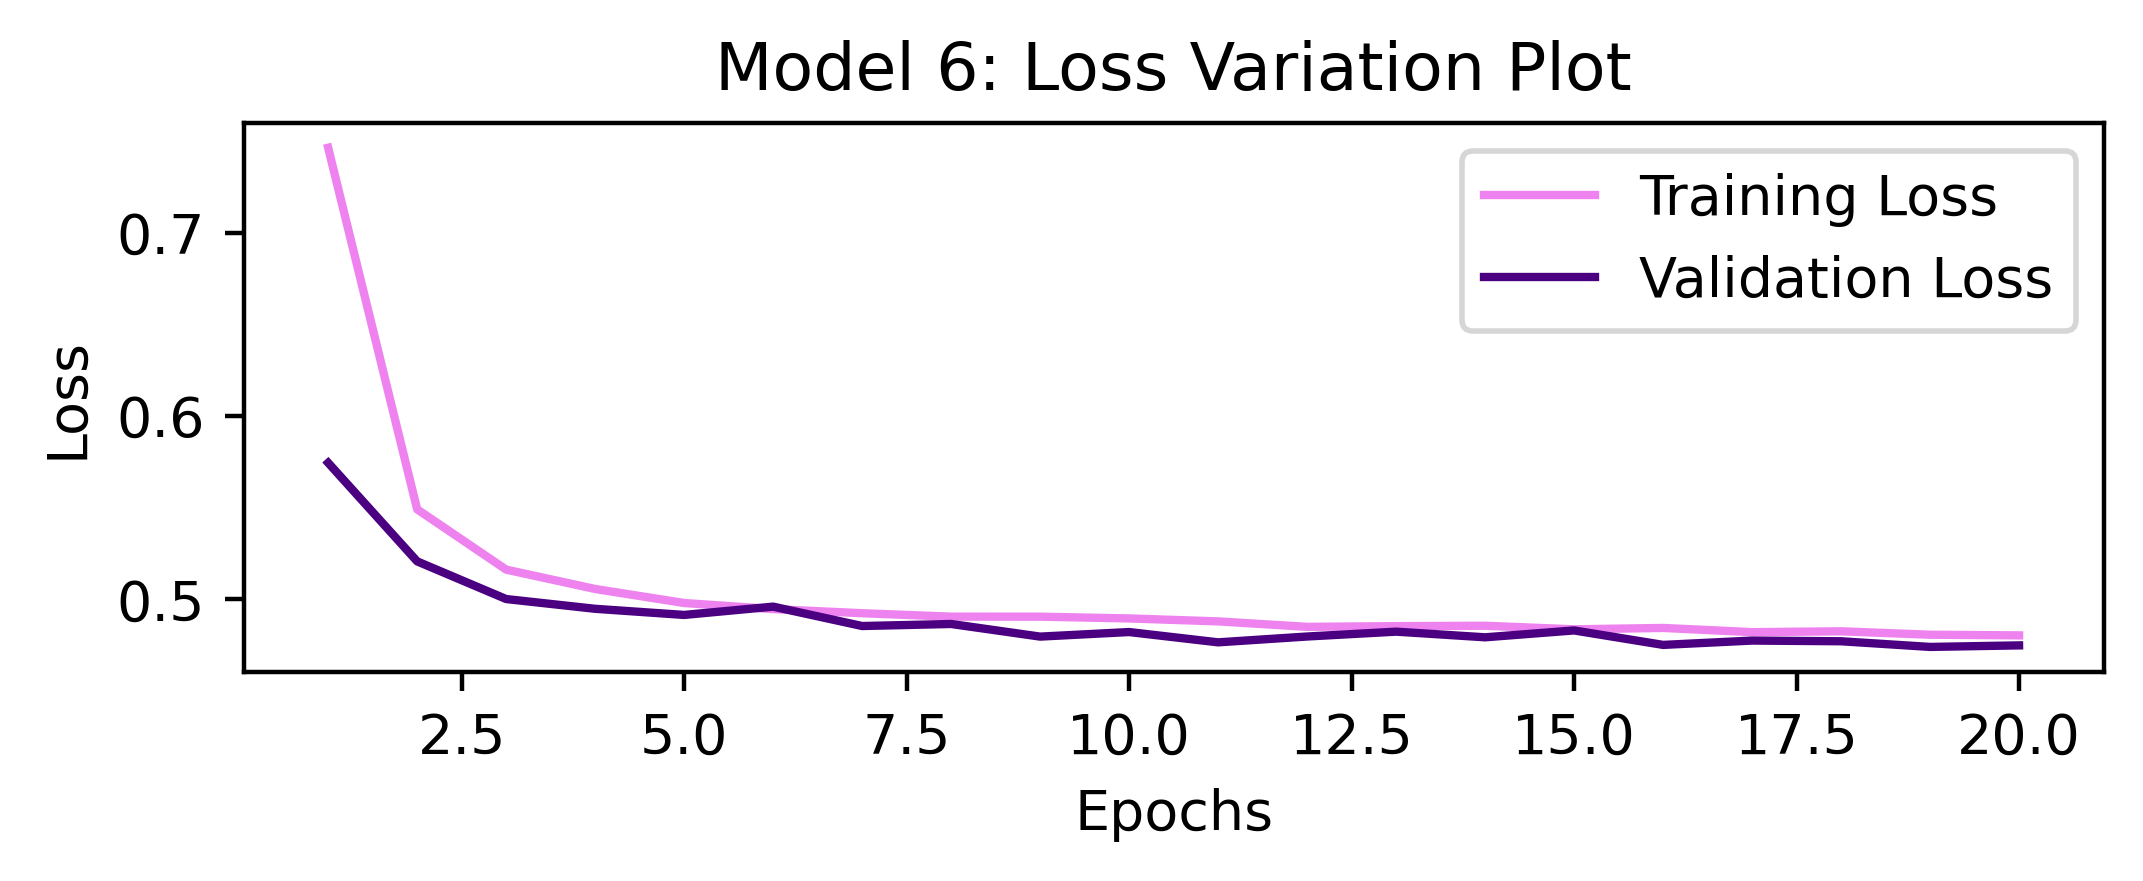

In [43]:
training_loss = model_6_fit.history['loss']
validation_loss = model_6_fit.history['val_loss']
epoch_count_model_61 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Model 6: Loss Variation Plot')
plt.plot(epoch_count_model_61, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count_model_61, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

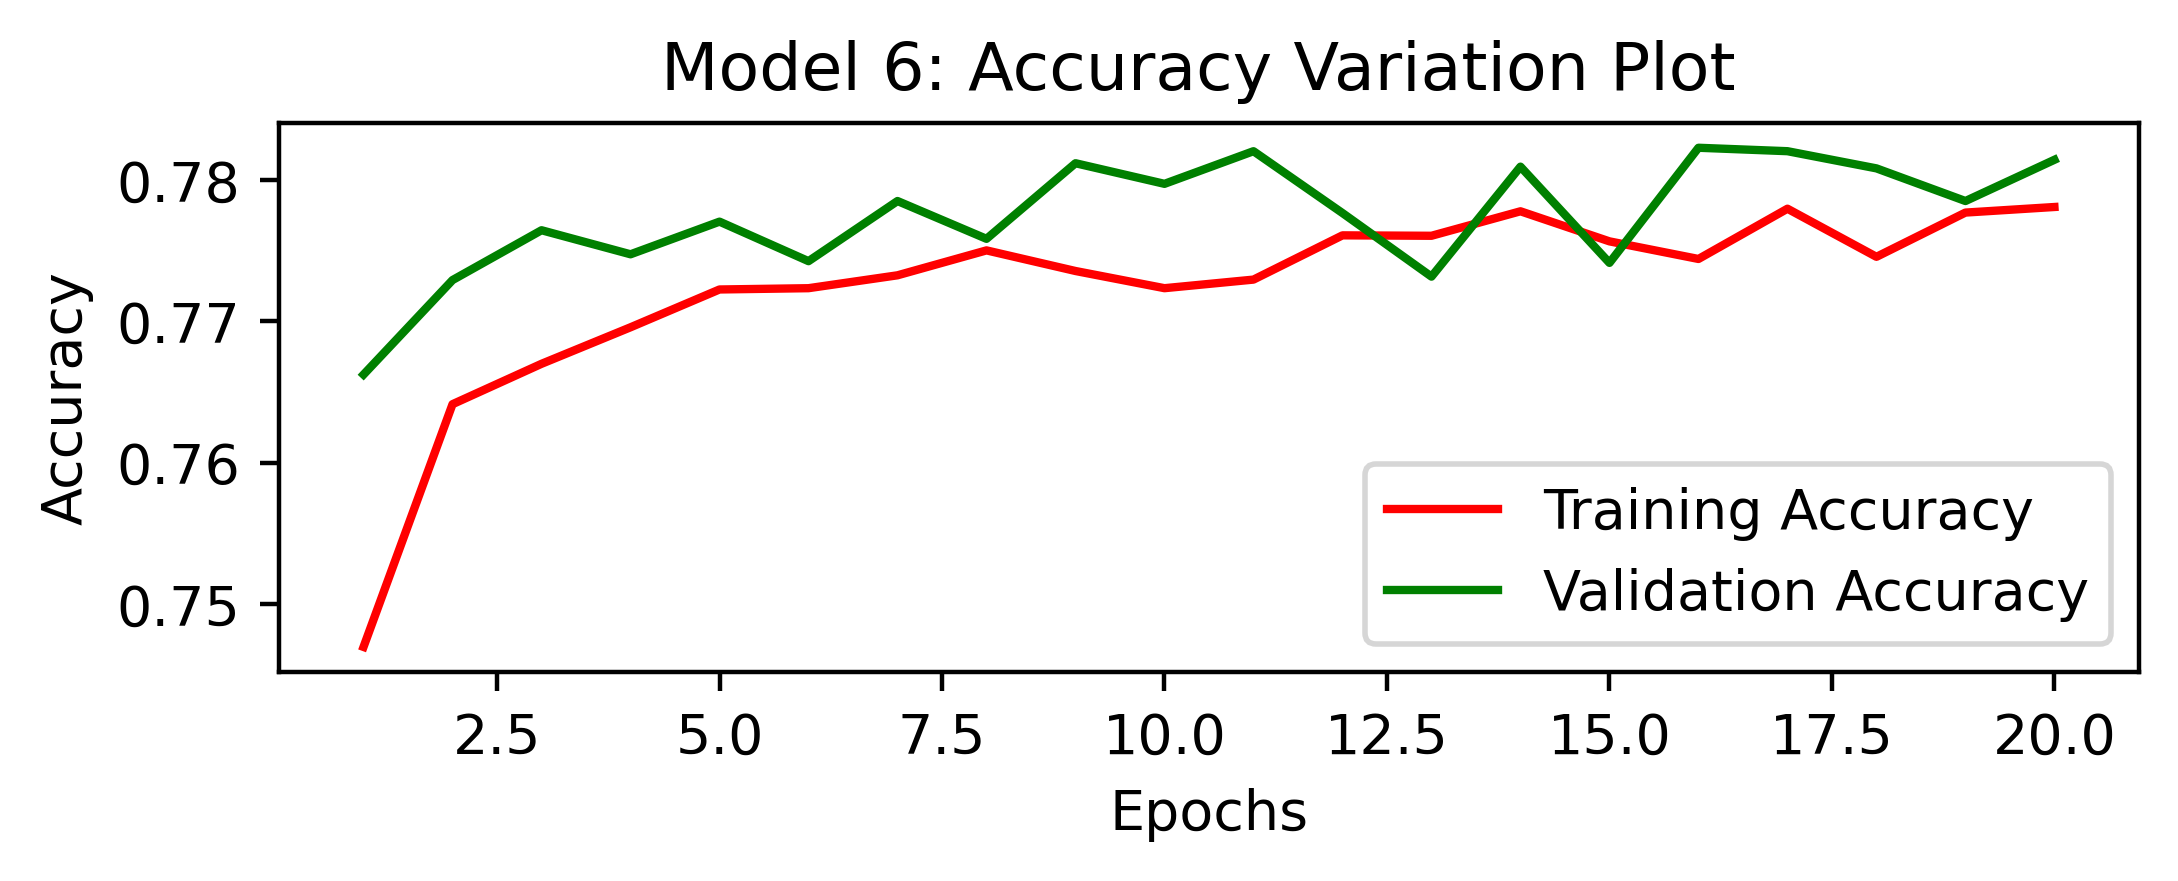

In [44]:
training_acc = model_6_fit.history['accuracy']
validation_acc = model_6_fit.history['val_accuracy']
epoch_count_model_62 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Model 6: Accuracy Variation Plot ')
plt.plot(epoch_count_model_62, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count_model_62, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [53]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 12)                0         
                                                                 
 dense_19 (Dense)            (None, 210)               2730      
                                                                 
 dense_20 (Dense)            (None, 210)               44310     
                                                                 
 dense_21 (Dense)            (None, 210)               44310     
                                                                 
 dense_22 (Dense)            (None, 210)               44310     
                                                                 
 dense_23 (Dense)            (None, 210)               44310     
                                                                 
 dense_24 (Dense)            (None, 210)              

In [60]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 12)                0         
                                                                 
 dense_31 (Dense)            (None, 210)               2730      
                                                                 
 dropout_4 (Dropout)         (None, 210)               0         
                                                                 
 dense_32 (Dense)            (None, 210)               44310     
                                                                 
 dropout_5 (Dropout)         (None, 210)               0         
                                                                 
 dense_33 (Dense)            (None, 210)               44310     
                                                                 
 dropout_6 (Dropout)         (None, 210)              